# Movilidad Sustentable
## Ciencia de Datos & Inteligencia de Negocios

### Configuración

In [1]:
"""
Bicicletas: Recorridos
Clima: PRCP TAVG TEMP[C] HUM[%] PNM[hPa] DD[gr] FF[km/hr]                                                 
2020-2021
Data acquisition & wrangling
"""

import os
import sys
# import urllib.request

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from matplotlib import pyplot
# import matplotlib.pyplot as plt
# figure( figsize = ( 20, 5 ), dpi = 300)
from matplotlib.pyplot import figure, legend
pyplot.rcParams["legend.loc"] = 'best'
pyplot.rcParams["figure.figsize"] = (20,5)
pyplot.rcParams["figure.dpi"] = 320
pyplot.style.use( 'ggplot' )


# import datetime
# from datetime import date, timedelta
# import re

datadir = 'datasets/'

In [ ]:
# pyplot.rcParams.keys()

In [2]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    from google.colab import drive
    drive.mount(
      '/content/drive/', 
    )
    if drive:
        datadir = '/content/drive/MyDrive/Academicos/UTN/BI/datasets/'
else:
    print('Not running on CoLab')

Not running on CoLab


In [2]:
datasets = {
  "recorridos" : {
    "df"     : pd.DataFrame(),
    "local"  : datadir + 'recorridos.zip',
  },
  "estaciones" : {
    "df"     : pd.DataFrame(),
    "local"  : datadir + 'estaciones.csv',
  }
}

In [3]:
"""
Cargar insumos
"""
def cargar_insumos( insumos ):
    for i in insumos:
        if "zip" in insumos[i]["local"]:
            insumos[i]["df"] = pd.read_csv(
                insumos[i]["local"],
                compression = 'zip',
                encoding = 'utf-8', 
            )
        if "csv" in insumos[i]["local"]:
            insumos[i]["df"] = pd.read_csv(
                insumos[i]["local"],
            )
        if "xlsx" in insumos[i]["local"]:
            insumos[i]["df"] = pd.read_excel(
                insumos[i]["local"],
            )
        
        print( 'Cargado: ', insumos[i]["local"] )
    return insumos

In [4]:
insumos = cargar_insumos( datasets )

Cargado:  datasets/recorridos.zip
Cargado:  datasets/estaciones.csv


In [5]:
# datasets["recorridos"]["df"].isnull().sum()
# datasets["recorridos"]["df"][ datasets["recorridos"]["df"]["DD"].isnull() ]
datasets["recorridos"]["df"][ datasets["recorridos"]["df"]["PRCP"].isnull() ]

duracion  usuario_id  origen_id              origen_nombre  \
2929084       969       48846        194  PERÓN Y ACUÑA DE FIGUEROA   
2929085      1739      741483         29          PARQUE CENTENARIO   
2929086      1889      277991          5               PLAZA ITALIA   
2929087       489      743741         38             PLAZA LIBERTAD   
2929088      1923      718455          5               PLAZA ITALIA   
...           ...         ...        ...                        ...   
2950084       921      567017         94                     GÚZMAN   
2950085      1320      558116        197      PLAZA CIUDAD DE UDINE   
2950086       721      676223         82          HOSPITAL ITALIANO   
2950087       221      326811        272       PLAZA BRUNO GIORDANO   
2950088       432      692020         30                       PEÑA   

                origen_fecha origen_direccion  destino_id  \
2929084  2021-02-12 23:59:23             CODE         101   
2929085  2021-02-12 23:59:16             CODE          29   
2929086  2021-02-12 23:58:44             CODE           5   
2929087  2021-02-12 23:58:19             CODE          71   
2929088  2021-02-12 23:58:07             CODE           5   
...                      ...              ...         ...   
2950084  2021-02-11 00:00:52             CODE          25   
2950085  2021-02-11 00:00:49             CODE          45   
2950086  2021-02-11 00:00:32             CODE         165   
2950087  2021-02-11 00:00:24             CODE         272   
2950088  2021-02-11 00:00:06             CODE           9   

                          destino_nombre        destino_fecha       fecha  \
2929084                         FITZ ROY  2021-02-13 00:15:32  2021-02-12   
2929085                PARQUE CENTENARIO  2021-02-13 00:28:15  2021-02-12   
2929086                     PLAZA ITALIA  2021-02-13 00:30:13  2021-02-12   
2929087                          CERRITO  2021-02-13 00:06:28  2021-02-12   
2929088                     PLAZA ITALIA  2021-02-13 00:30:10  2021-02-12   
...                                  ...                  ...         ...   
2950084                     PLAZA GUEMES  2021-02-11 00:16:13  2021-02-11   
2950085                          URUGUAY  2021-02-11 00:22:49  2021-02-11   
2950086  PLAZA MONSEÑOR MIGUEL DE ANDREA  2021-02-11 00:12:33  2021-02-11   
2950087             PLAZA BRUNO GIORDANO  2021-02-11 00:04:05  2021-02-11   
2950088                 PARQUE LAS HERAS  2021-02-11 00:07:18  2021-02-11   

         ...  vuelta  distancia  velocidad_kmm     DD    FF   HUM     PNM  \
2929084  ...       0       2.62       0.163750  320.0  11.0  84.0  1012.0   
2929085  ...       1       0.00       0.000000  320.0  11.0  84.0  1012.0   
2929086  ...       1       0.00       0.000000  320.0  11.0  84.0  1012.0   
2929087  ...       0       0.62       0.077500  320.0  11.0  84.0  1012.0   
2929088  ...       1       0.00       0.000000  320.0  11.0  84.0  1012.0   
...      ...     ...        ...            ...    ...   ...   ...     ...   
2950084  ...       0       3.09       0.206000  140.0  15.0  85.0  1016.2   
2950085  ...       0       3.60       0.163636  140.0  15.0  85.0  1016.2   
2950086  ...       0       2.10       0.175000  140.0  15.0  85.0  1016.2   
2950087  ...       1       0.00       0.000000  140.0  15.0  85.0  1016.2   
2950088  ...       0       1.12       0.160000  140.0  15.0  85.0  1016.2   

         TEMP  PRCP  TAVG  
2929084  22.5   NaN   NaN  
2929085  22.5   NaN   NaN  
2929086  22.5   NaN   NaN  
2929087  22.5   NaN   NaN  
2929088  22.5   NaN   NaN  
...       ...   ...   ...  
2950084  21.6   NaN   NaN  
2950085  21.6   NaN   NaN  
2950086  21.6   NaN   NaN  
2950087  21.6   NaN   NaN  
2950088  21.6   NaN   NaN  

[21005 rows x 29 columns]

In [6]:
# FILL NAN CON PROMEDIO o 0
for c in datasets["recorridos"]["df"].columns:
    nulls = datasets["recorridos"]["df"][c].isnull().sum()
    if nulls:
        mean = datasets["recorridos"]["df"][c].mean()
        fill = mean
        types = datasets["recorridos"]["df"][c].dtypes
        print( c, nulls, types, fill)
        datasets["recorridos"]["df"][c].fillna( mean, inplace = True)
datasets["recorridos"]["df"]

DD 14350 float64 156.64104709819665
FF 14350 float64 14.931178295966397
HUM 14350 float64 64.6412668564204
PNM 14350 float64 1015.1488488165911
TEMP 14350 float64 20.561729029970913
PRCP 21005 float64 0.9043308412575622
TAVG 21005 float64 19.582630359747565


duracion  usuario_id  origen_id      origen_nombre  \
0             882      666202        116    HOSPITAL ALEMÁN   
1             894      332689        116    HOSPITAL ALEMÁN   
2            1361       57949        116    HOSPITAL ALEMÁN   
3            1010      454846        116    HOSPITAL ALEMÁN   
4            1490      690975        116    HOSPITAL ALEMÁN   
...           ...         ...        ...                ...   
3331627       690       62246        292      PLAZA BOLIVIA   
3331628      1360      445201         79  AZUCENA VILLAFLOR   
3331629      1169      554162         79  AZUCENA VILLAFLOR   
3331630      1031       51005         79  AZUCENA VILLAFLOR   
3331631      1795      734428         79  AZUCENA VILLAFLOR   

                origen_fecha  origen_direccion  destino_id  \
0        2020-12-31 23:54:22  BERUTI & ECUADOR         142   
1        2020-12-29 12:39:18  BERUTI & ECUADOR         142   
2        2020-12-21 21:21:38  BERUTI & ECUADOR         142   
3        2020-12-20 21:58:19  BERUTI & ECUADOR         142   
4        2020-12-20 13:32:53  BERUTI & ECUADOR         142   
...                      ...               ...         ...   
3331627  2021-01-01 00:09:43              CODE          44   
3331628  2021-01-01 00:08:40              CODE         168   
3331629  2021-01-01 00:08:37              CODE           8   
3331630  2021-01-01 00:06:50              CODE          75   
3331631  2021-01-01 00:04:26              CODE         123   

                destino_nombre        destino_fecha       fecha  ...  vuelta  \
0            ARMENIA Y GORRITI  2021-01-01 00:09:04  2020-12-31  ...       0   
1            ARMENIA Y GORRITI  2020-12-29 12:54:12  2020-12-29  ...       0   
2            ARMENIA Y GORRITI  2020-12-21 21:44:19  2020-12-21  ...       0   
3            ARMENIA Y GORRITI  2020-12-20 22:15:09  2020-12-20  ...       0   
4            ARMENIA Y GORRITI  2020-12-20 13:57:43  2020-12-20  ...       0   
...                        ...                  ...         ...  ...     ...   
3331627              ECOPARQUE  2021-01-01 00:21:13  2021-01-01  ...       0   
3331628         ESTADOS UNIDOS  2021-01-01 00:31:20  2021-01-01  ...       0   
3331629               CONGRESO  2021-01-01 00:28:06  2021-01-01  ...       0   
3331630  PLAZA PRIMERO DE MAYO  2021-01-01 00:24:01  2021-01-01  ...       0   
3331631                ARMENIA  2021-01-01 00:34:21  2021-01-01  ...       0   

         distancia  velocidad_kmm     DD    FF   HUM     PNM  TEMP  PRCP  TAVG  
0             2.43       0.173571  320.0  17.0  45.0  1013.2  22.7   0.0  22.3  
1             2.43       0.173571   50.0  11.0  70.0  1008.6  26.4   0.0  26.1  
2             2.43       0.110455   90.0  13.0  71.0  1016.3  21.1   0.0  19.6  
3             2.43       0.151875  200.0   7.0  38.0  1014.0  20.5   0.0  18.6  
4             2.43       0.101250  230.0  20.0  39.0  1012.1  20.6   0.0  18.6  
...            ...            ...    ...   ...   ...     ...   ...   ...   ...  
3331627       2.43       0.220909  320.0  15.0  44.0  1013.5  22.0   0.0  25.3  
3331628       1.75       0.079545  320.0  15.0  44.0  1013.5  22.0   0.0  25.3  
3331629       2.35       0.123684  320.0  15.0  44.0  1013.5  22.0   0.0  25.3  
3331630       3.22       0.189412  320.0  15.0  44.0  1013.5  22.0   0.0  25.3  
3331631       6.01       0.207241  320.0  15.0  44.0  1013.5  22.0   0.0  25.3  

[3331632 rows x 29 columns]

## Analisis Exploratorio de Datos (EDA)
## Time series analisis
- Diaria DElta
- Seasonalidad semanal
- Seasonalidad anual

### Gruoup by recurrent users top 20
- Durations mean max
- cantidad de viajes
- duraciones 

### Estaciones mas usadas 
- Relación con anclajes
- Bicis ancladas x hora
- Distancias
- Matriz de cantidad de viajes entre cada una
- distancias a zonas de gran afluencia
- duracióones
- desviación de la duración promedio
- Circle graph
- Plazas en uso bicicletas en uso

### IDAS / Vueltas
- Distancias ida
- Duraciones de estaciones a vueltas mismo destino
- deviations del promedio
- nada con distancias

### cut
How to use pandas cut() and qcut()?
https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/

In [ ]:
# datasets['recorridos']['df'] = datasets['recorridos']['df'].drop(columns = ['Unnamed: 0'])
datasets['recorridos']['df'].info()

In [13]:
datasets['recorridos']['df'].describe()

duracion    usuario_id     origen_id    destino_id          ndia  \
count  3.331632e+06  3.331632e+06  3.331632e+06  3.331632e+06  3.331632e+06   
mean   1.360008e+03  4.366418e+05  1.526023e+02  1.537240e+02  1.727415e+02   
std    5.219582e+03  2.613882e+05  1.036271e+02  1.039965e+02  1.189105e+02   
min    0.000000e+00  3.700000e+01  1.000000e+00  1.000000e+00  1.000000e+00   
25%    6.830000e+02  1.747990e+05  7.000000e+01  7.100000e+01  5.800000e+01   
50%    1.095000e+03  4.971600e+05  1.420000e+02  1.420000e+02  1.510000e+02   
75%    1.613000e+03  6.840670e+05  2.270000e+02  2.270000e+02  2.870000e+02   
max    3.190094e+06  7.722650e+05  3.990000e+02  3.990000e+02  3.660000e+02   

               wdia        dhabil          hora          mins          ddia  \
count  3.331632e+06  3.331632e+06  3.331632e+06  3.331632e+06  3.331632e+06   
mean   3.032122e+00  2.676250e-01  1.431416e+01  2.915972e+01  3.183070e+02   
std    1.916750e+00  4.427210e-01  5.293337e+00  1.726815e+01  1.274829e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    1.000000e+00  0.000000e+00  1.100000e+01  1.400000e+01  2.530000e+02   
50%    3.000000e+00  0.000000e+00  1.500000e+01  2.900000e+01  3.320000e+02   
75%    5.000000e+00  1.000000e+00  1.800000e+01  4.400000e+01  4.170000e+02   
max    6.000000e+00  1.000000e+00  2.300000e+01  5.900000e+01  5.180000e+02   

       ...  velocidad_kmm            DD            FF           HUM  \
count  ...   3.331632e+06  3.331632e+06  3.331632e+06  3.331632e+06   
mean   ...   1.229052e-01  1.566410e+02  1.493118e+01  6.464127e+01   
std    ...   6.643371e-02  1.338127e+02  7.319382e+00  2.118369e+01   
min    ...   0.000000e+00  0.000000e+00  0.000000e+00  1.700000e+01   
25%    ...   8.500000e-02  7.000000e+01  9.000000e+00  5.400000e+01   
50%    ...   1.325000e-01  1.100000e+02  1.300000e+01  6.700000e+01   
75%    ...   1.680000e-01  2.000000e+02  1.900000e+01  7.700000e+01   
max    ...   1.505000e+00  9.900000e+02  5.700000e+01  1.014000e+03   

                PNM          TEMP          PRCP          TAVG          TMAX  \
count  3.331632e+06  3.331632e+06  3.331632e+06  3.331632e+06  3.331632e+06   
mean   1.015149e+03  2.056173e+01  6.710092e+00  1.958263e+01  2.454932e+01   
std    1.390818e+01  5.092304e+00  4.782014e+00  4.843546e+00  3.666587e+00   
min    5.000000e+01  3.200000e+00  0.000000e+00  7.600000e+00  1.160000e+01   
25%    1.011500e+03  1.670000e+01  6.710092e+00  1.600000e+01  2.430000e+01   
50%    1.015149e+03  2.110000e+01  6.710092e+00  2.040000e+01  2.454932e+01   
75%    1.019000e+03  2.430000e+01  6.710092e+00  2.340000e+01  2.460000e+01   
max    1.035600e+03  3.530000e+01  6.100000e+01  2.890000e+01  3.550000e+01   

               TMIN  
count  3.331632e+06  
mean   1.544082e+01  
std    4.852400e+00  
min    2.600000e+00  
25%    1.240000e+01  
50%    1.544082e+01  
75%    1.900000e+01  
max    2.630000e+01  

[8 rows x 25 columns]

In [ ]:
## Time series analisis

In [62]:
### Analisis Diario
demanda_diaria = datasets["recorridos"]["df"]
demanda_diaria = demanda_diaria.groupby(
    ['origen_nombre', 'origen_id','fecha',]
).agg(
  salidas = ( 'origen_id',  'count'),
#   total = ( 'origen_id',  'count'),
  duracion = ( 'duracion_mins',  'mean'),
)
demanda_diaria = demanda_diaria.pivot_table(
    index = [ 'origen_nombre', 'origen_id', ],
    columns = ["fecha"],
    values = ["salidas", "duracion"],
    
    # aggfunc ='sum',
    fill_value =0,
).sort_values('origen_id')
demanda_diaria

duracion                                     \
fecha                         2020-01-01  2020-01-02  2020-01-03 2020-01-04   
origen_nombre       origen_id                                                 
FACULTAD DE DERECHO 1          70.461538   30.117647   35.480000  73.196970   
RETIRO I            2          80.375000   24.368421   42.956522  70.480000   
ADUANA              3          50.111111   27.234043   20.333333  30.307692   
PLAZA ROMA          4          35.800000   27.156250   19.960000  43.500000   
PLAZA ITALIA        5          60.538462   38.685185   38.571429  58.333333   
...                                  ...         ...         ...        ...   
BARRIO 31           393        30.900000  140.260870  109.592593  91.090909   
AV. LA PLATA        394         0.000000    0.000000    0.000000   0.000000   
AGRONOMIA II        395         0.000000    0.000000    0.000000   0.000000   
PLAZA ALBERTI       396        38.043478   32.148148   27.093023  61.178571   
GARCIA DEL RIO      399        37.375000   24.945946  208.956522  53.511111   

                                                                              \
fecha                          2020-01-05 2020-01-06  2020-01-07  2020-01-08   
origen_nombre       origen_id                                                  
FACULTAD DE DERECHO 1           45.048780  25.717391   20.200000   19.574074   
RETIRO I            2           62.473684  18.363636   17.700000   34.192308   
ADUANA              3           70.240000  11.898305   24.210526   14.633333   
PLAZA ROMA          4           49.333333  17.896552   28.034483   15.116279   
PLAZA ITALIA        5           54.661972  37.537313   24.557692   39.186441   
...                                   ...        ...         ...         ...   
BARRIO 31           393        127.000000  62.600000  306.769231  104.516129   
AV. LA PLATA        394          0.000000   0.000000    0.000000    0.000000   
AGRONOMIA II        395          0.000000   0.000000    0.000000    0.000000   
PLAZA ALBERTI       396         44.173913  28.518519   27.078947   27.481481   
GARCIA DEL RIO      399         65.461538  28.191489   43.152174   27.540541   

                                                      ...    salidas  \
fecha                         2020-01-09  2020-01-10  ... 2021-05-24   
origen_nombre       origen_id                         ...              
FACULTAD DE DERECHO 1          24.970588   22.906977  ...         45   
RETIRO I            2          21.642857  117.733333  ...          5   
ADUANA              3          12.844444   16.208333  ...          4   
PLAZA ROMA          4          19.333333   29.066667  ...          4   
PLAZA ITALIA        5          40.100000   53.092593  ...         40   
...                                  ...         ...  ...        ...   
BARRIO 31           393        43.424242  229.428571  ...          6   
AV. LA PLATA        394         0.000000    0.000000  ...          6   
AGRONOMIA II        395         0.000000    0.000000  ...          9   
PLAZA ALBERTI       396        35.843750   29.791667  ...         26   
GARCIA DEL RIO      399        64.194444   30.675676  ...         47   

                                                                           \
fecha                         2021-05-25 2021-05-26 2021-05-27 2021-05-28   
origen_nombre       origen_id                                               
FACULTAD DE DERECHO 1                 51         57         74         76   
RETIRO I            2                  3         21         16         14   
ADUANA              3                  9         21         18         19   
PLAZA ROMA          4                  9         18         15         15   
PLAZA ITALIA        5                 47         60         83         82   
...                                  ...        ...        ...        ...   
BARRIO 31           393                1          4          2          8   
AV. LA PLATA        394  

In [ ]:
# demanda_diaria["salidas"].mean().plot()

# # # first we'll do it the default way, with gaps on weekends
# # fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
# # ax1.plot(r.date, r.adj_close, 'o-')
# # ax1.set_title( "Default" )
# # fig.autofmt_xdate()

# pyplot.show()


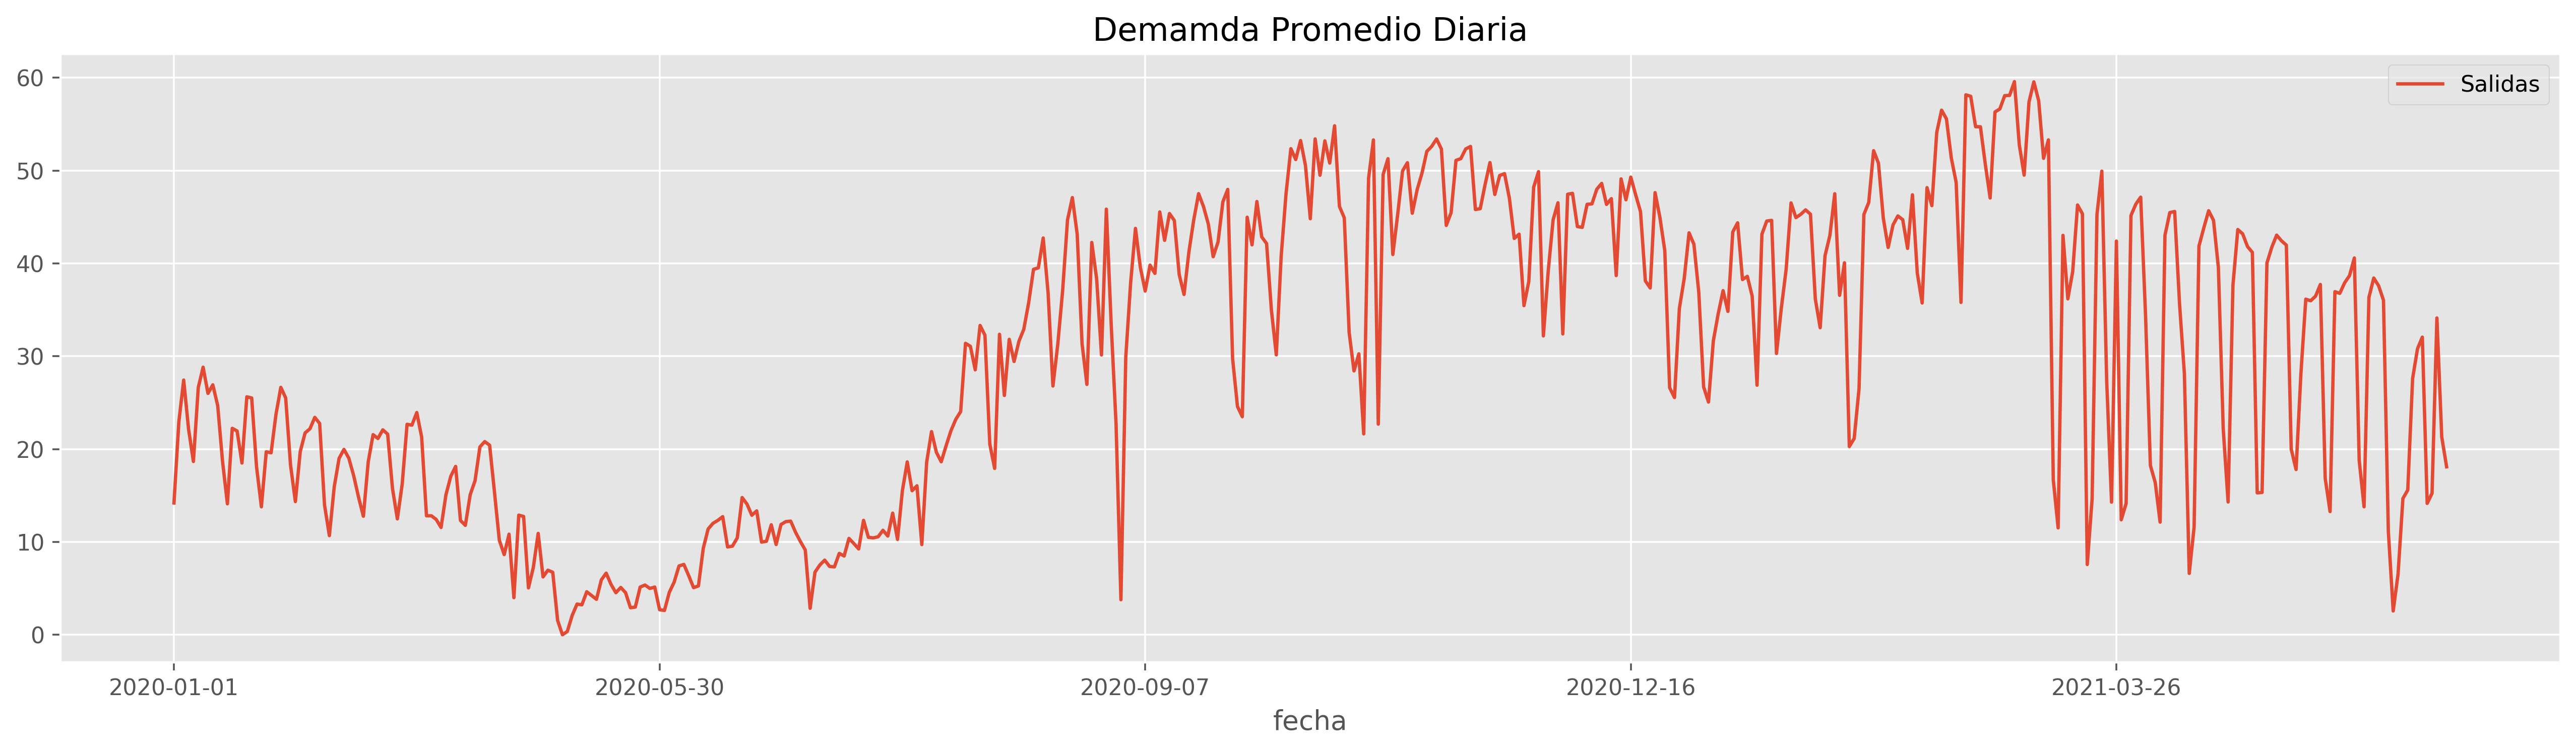

In [9]:
demanda_diaria["salidas"].mean().plot( label = 'Salidas' )
pyplot.legend( loc = 'best' )
pyplot.title( 'Demamda Promedio Diaria' )
pyplot.show()

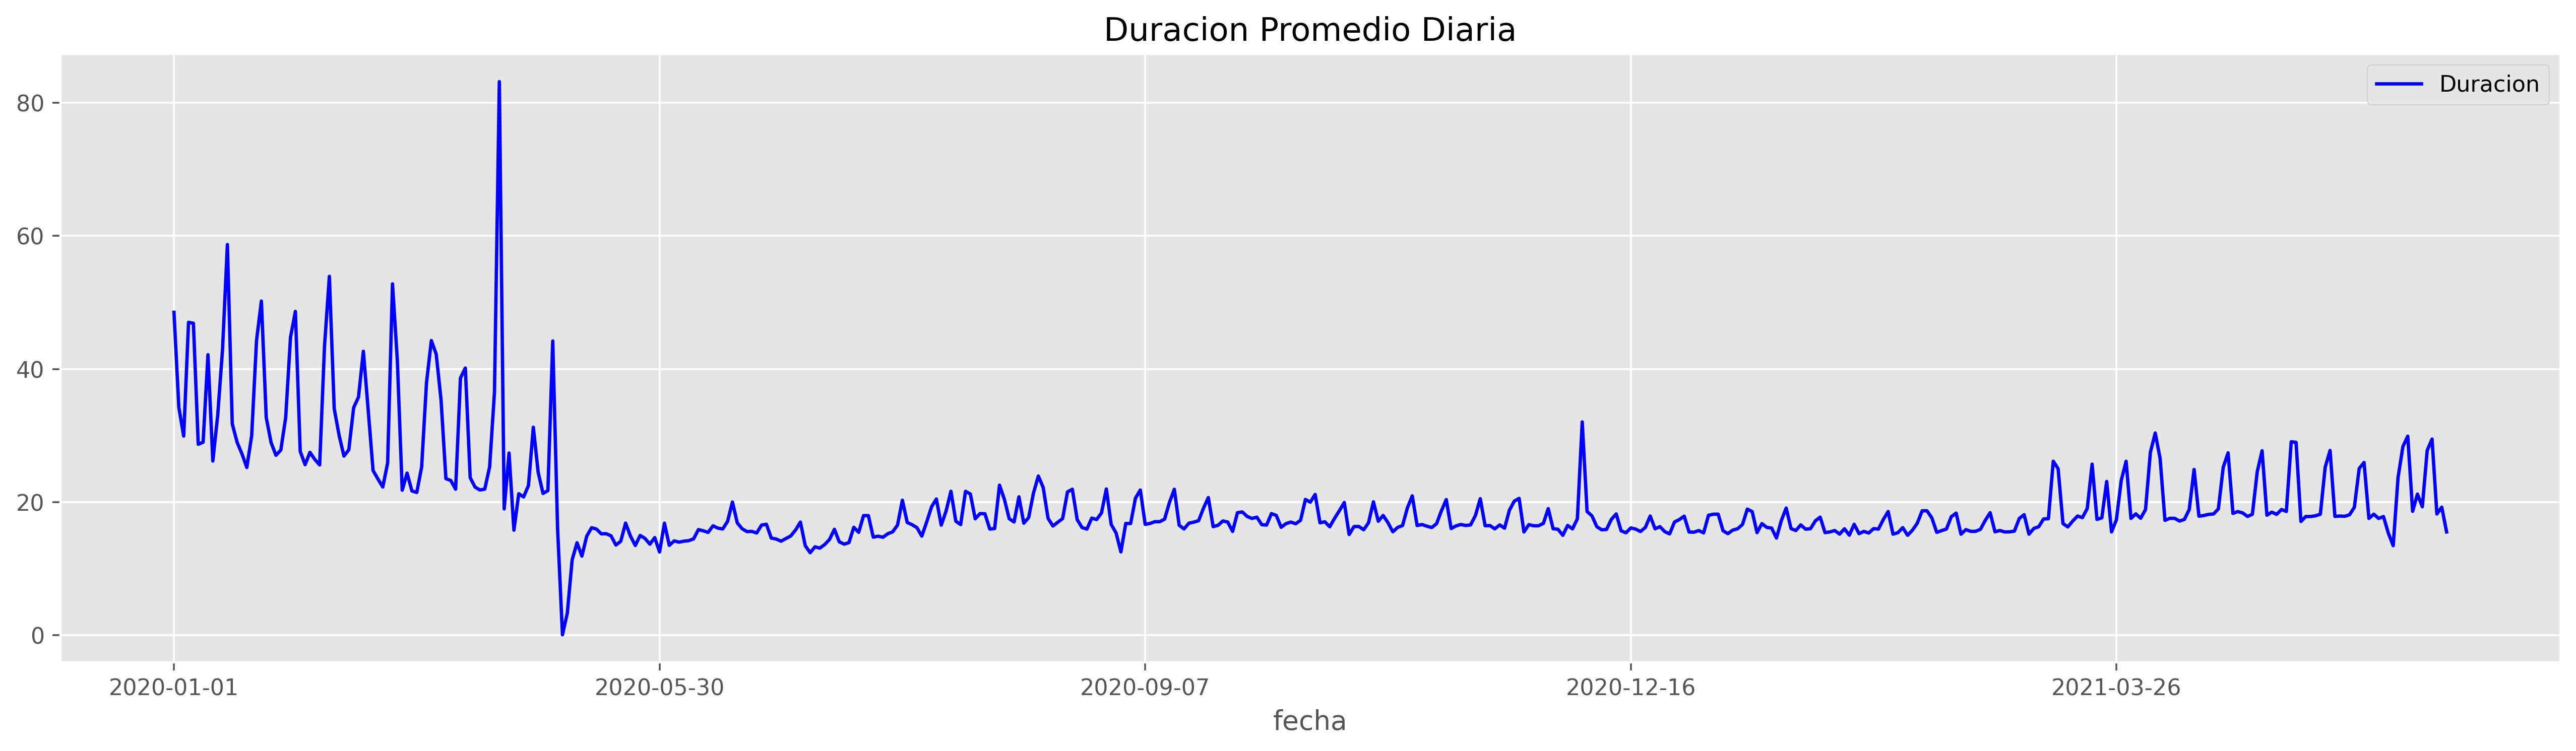

In [61]:
demanda_diaria["duracion"].mean().plot( kind = 'line', label = 'Duracion', color={"Duracion": "blue"} )
pyplot.legend( loc = 'best' )
pyplot.title( 'Duracion Promedio Diaria' )
pyplot.show()

In [18]:
demanda_wdia = datasets["recorridos"]["df"]
demanda_wdia = demanda_wdia.groupby(
    ['origen_nombre', 'origen_id','wdia',]
).agg(
  salidas = ( 'wdia',  'count'),
  total = ( 'origen_id',  'count'),
  duracion = ( 'duracion_mins',  'mean'),
)
demanda_wdia = demanda_wdia.pivot_table(
    index = [ 'origen_nombre', 'origen_id', ],
    columns = ["wdia"],
    values = ["salidas", "duracion"],
    # aggfunc ='sum',
    fill_value =0,
).sort_values('origen_id')
demanda_wdia

duracion                                   \
wdia                                    0          1          2          3   
origen_nombre       origen_id                                                
FACULTAD DE DERECHO 1           29.130038  23.546953  21.225614  21.116449   
RETIRO I            2           28.410227  20.593193  18.724343  20.233798   
ADUANA              3           29.198135  17.000000  18.642523  16.953820   
PLAZA ROMA          4           30.021104  24.494297  19.554134  17.239739   
PLAZA ITALIA        5           29.534448  25.312024  21.766303  22.778428   
...                                   ...        ...        ...        ...   
BARRIO 31           393        151.409736  24.949691  33.945528  31.627660   
AV. LA PLATA        394         32.163636  19.467742  20.450000  20.448718   
AGRONOMIA II        395         38.340909  23.277228  25.918919  23.469565   
PLAZA ALBERTI       396         30.272828  22.765625  21.764883  21.954128   
GARCIA DEL RIO      399         29.688673  23.163756  23.861369  22.377278   

                                                               salidas        \
wdia                                   4          5          6       0     1   
origen_nombre       origen_id                                                  
FACULTAD DE DERECHO 1          22.514193  22.043832  28.398643    5806  4792   
RETIRO I            2          19.814879  21.919628  26.674550     880  1234   
ADUANA              3          17.072194  16.464928  28.249637     858  1627   
PLAZA ROMA          4          18.506446  20.629490  26.055866     616  1052   
PLAZA ITALIA        5          21.549500  22.435079  26.685677    4906  4599   
...                                  ...        ...        ...     ...   ...   
BARRIO 31           393        24.254344  39.175043  37.878505     493  1133   
AV. LA PLATA        394        52.639706  18.629921  26.510204      55   124   
AGRONOMIA II        395        21.439560  24.478723  27.500000      44   101   
PLAZA ALBERTI       396        22.134285  22.526366  27.825632    2705  2944   
GARCIA DEL RIO      399        22.943915  27.018020  29.140099    4529  3951   

                                                             
wdia                              2     3     4     5     6  
origen_nombre       origen_id                                
FACULTAD DE DERECHO 1          4357  4371  4298  4175  5160  
RETIRO I            2          1179  1219  1156  1182   888  
ADUANA              3          1712  1754  1773  1725   689  
PLAZA ROMA          4          1016  1072  1086  1058   537  
PLAZA ITALIA        5          4493  4617  4697  4544  4629  
...                             ...   ...   ...   ...   ...  
BARRIO 31           393        1230  1222  1266  1154   749  
AV. LA PLATA        394         120   156   136   127    49  
AGRONOMIA II        395         111   115    91    94    36  
PLAZA ALBERTI       396        2990  3052  3083  3129  2770  
GARCIA DEL RIO      399        4090  3732  3780  3829  4040  

[236 rows x 14 columns]

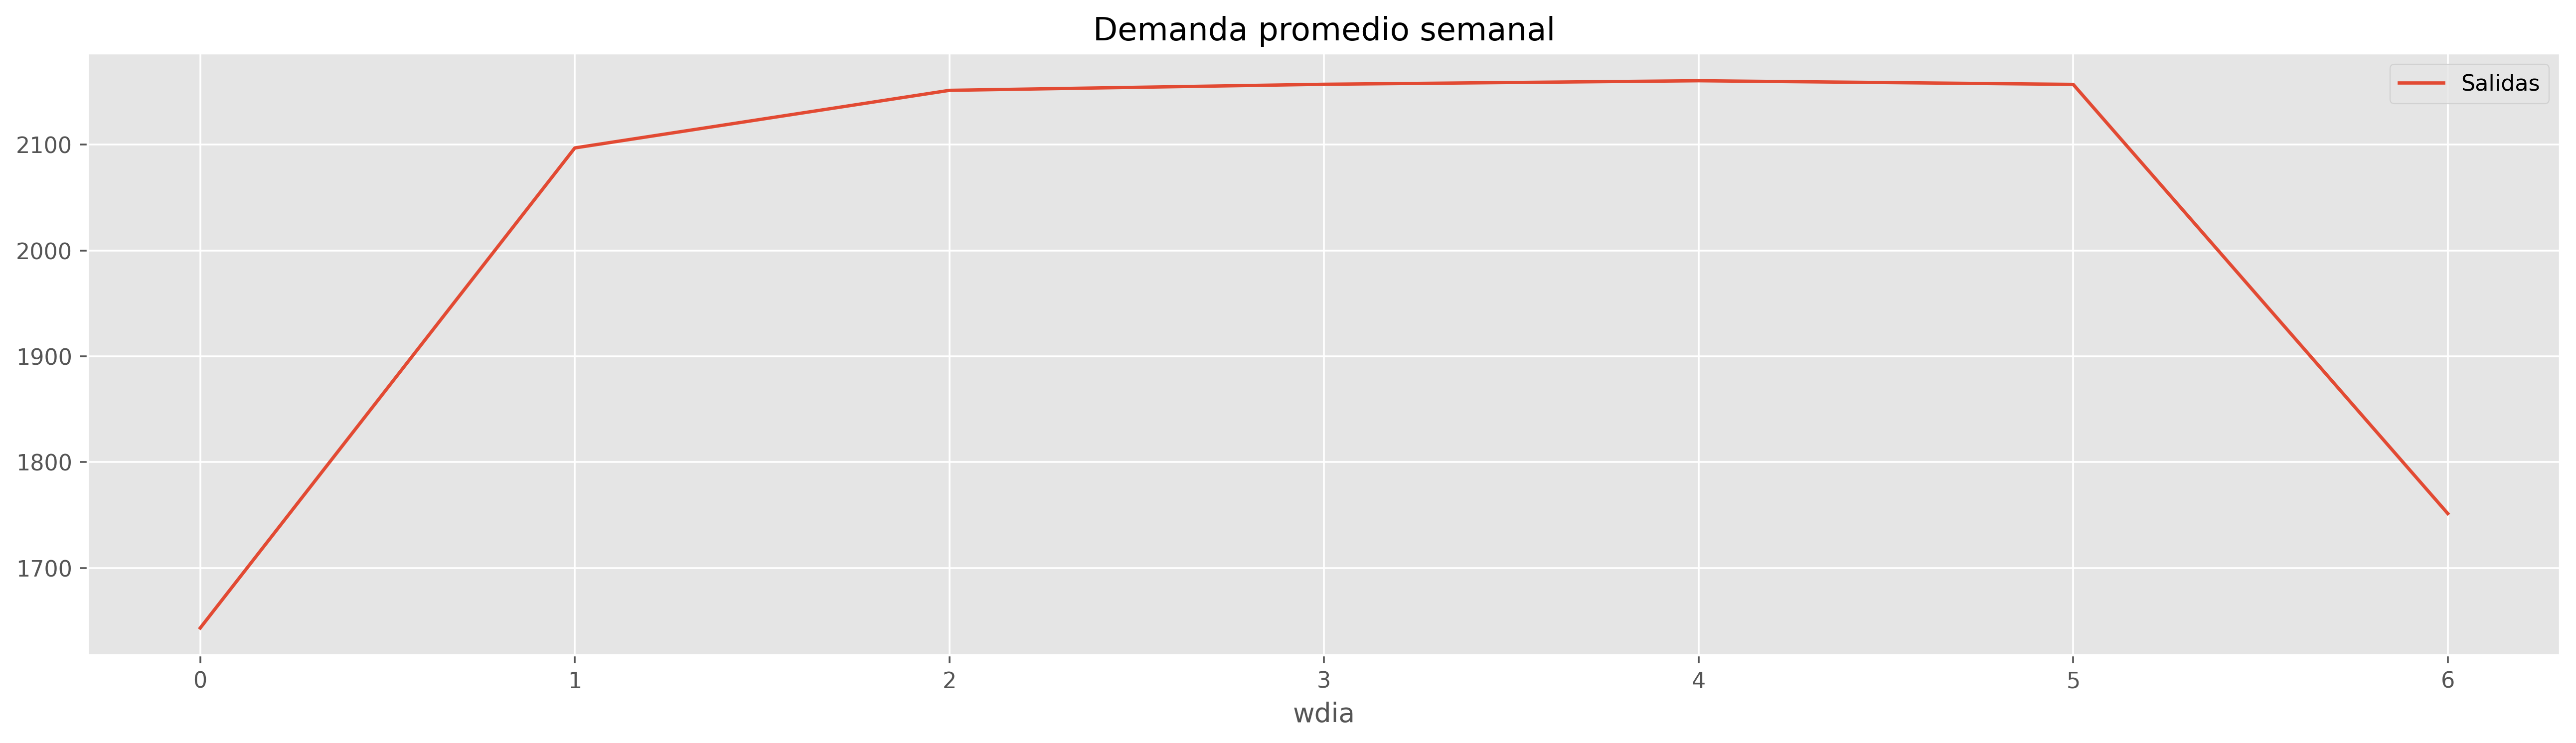

In [56]:
demanda_wdia["salidas"].mean().plot( kind = 'line', label = 'Salidas')
pyplot.legend( loc = 'best' )
pyplot.title( 'Demanda promedio semanal' )
pyplot.show()

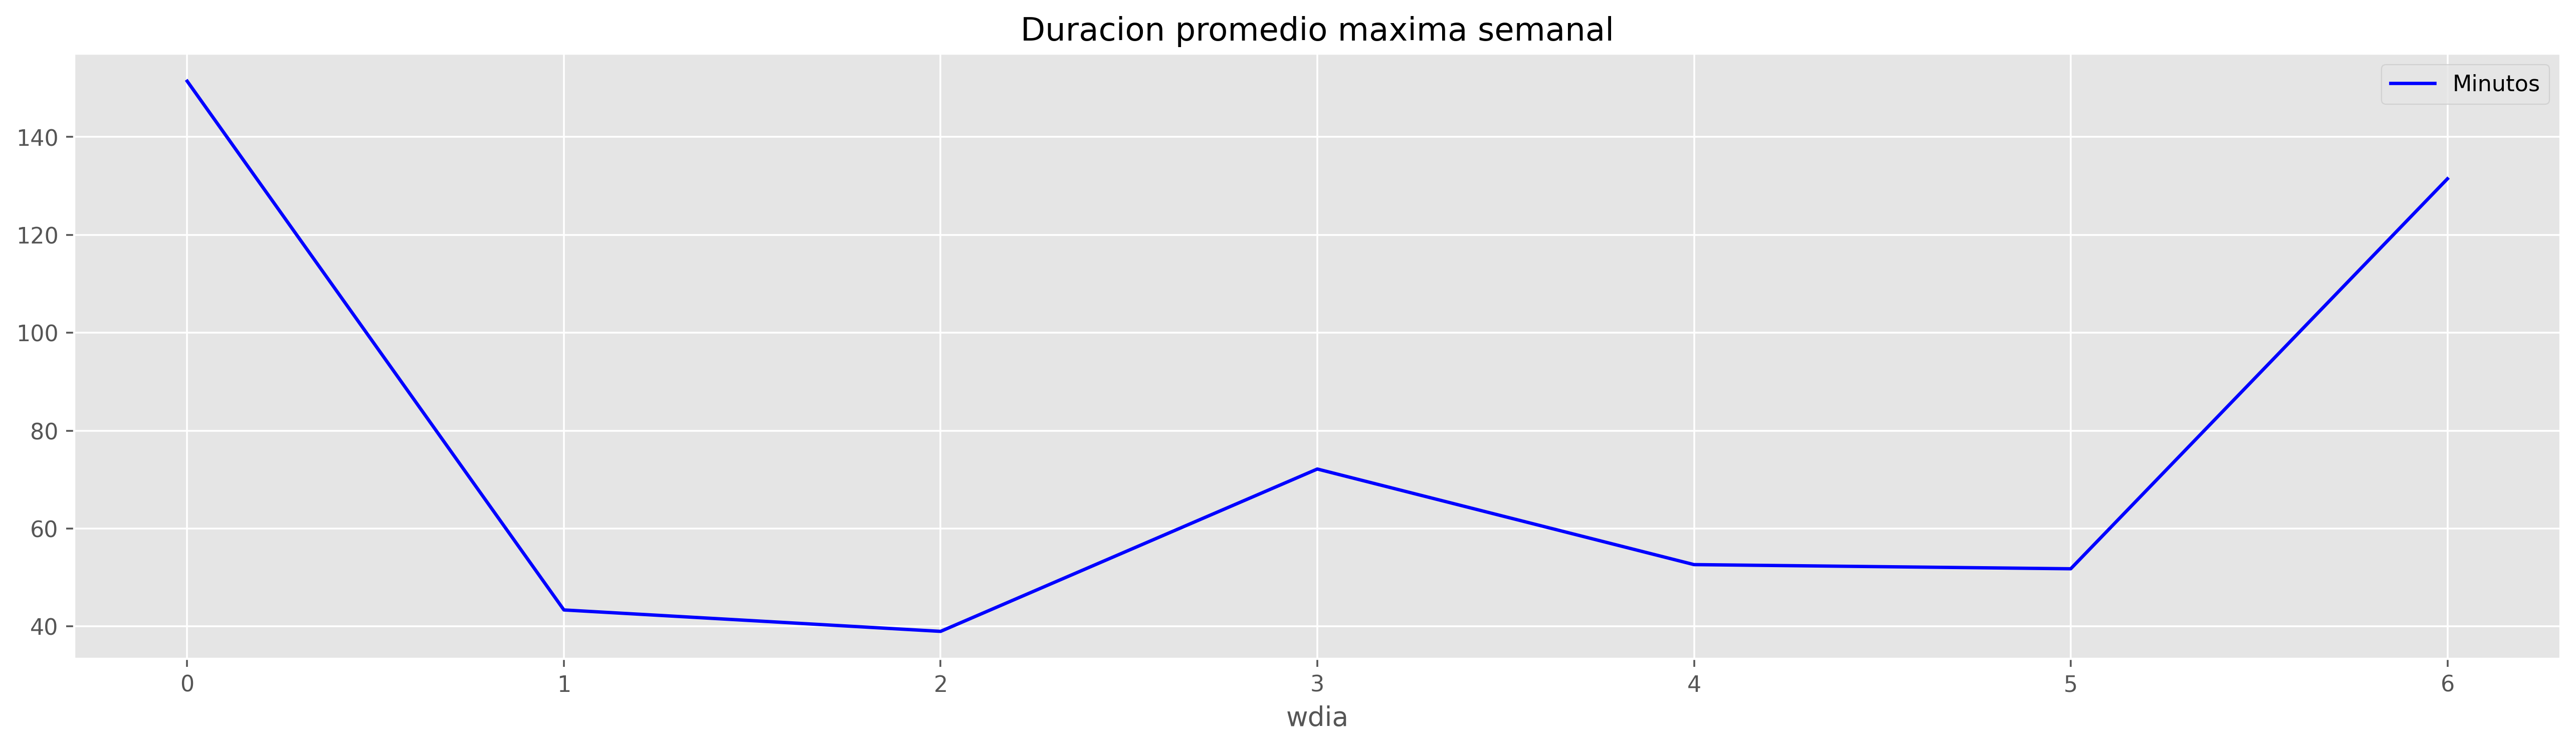

In [60]:
demanda_wdia["duracion"].max().plot( kind = 'line', label = 'Minutos', color={"Minutos": "blue"})
pyplot.legend( loc = 'best' )
pyplot.title( 'Duracion promedio maxima semanal' )
pyplot.show()

In [20]:
# DEMANDA HORARIA
demanda_horaria = datasets["recorridos"]["df"]
# Fitro x dia
demanda_horaria = demanda_horaria.groupby(
    ['origen_nombre', 'origen_id','hora',]
).agg(
  salidas = ( 'hora',  'count'),
  duracion = ( 'duracion_mins',  'mean'),
#   total = ( 'origen_id',  'sum'),
)
demanda_horaria = demanda_horaria.pivot_table(
    index = [ 'origen_nombre',  'origen_id', ],
    columns = ["hora"],
    values = ["salidas", 'duracion'],
    # aggfunc ='sum',
    fill_value =0,
).sort_values('origen_id')
demanda_horaria

duracion                                     \
hora                                  0          1           2           3    
origen_nombre       origen_id                                                 
FACULTAD DE DERECHO 1          27.865823  27.222222   59.351351   27.931373   
RETIRO I            2          15.319444  26.933333   14.500000   23.500000   
ADUANA              3          23.292929  25.785714   21.795455   25.700000   
PLAZA ROMA          4          26.215190  34.390244   29.344828  202.761905   
PLAZA ITALIA        5          22.607634  21.270169   22.718137   34.584416   
...                                  ...        ...         ...         ...   
BARRIO 31           393        57.365591  41.063492  143.333333   44.142857   
AV. LA PLATA        394        23.000000  16.500000    0.000000    4.000000   
AGRONOMIA II        395        20.714286  23.800000   23.333333   24.000000   
PLAZA ALBERTI       396        20.028646  20.331269   22.363636   22.593407   
GARCIA DEL RIO      399        23.486891  25.637771   33.754808   29.425000   

                                                                           \
hora                                  4          5          6          7    
origen_nombre       origen_id                                               
FACULTAD DE DERECHO 1          27.539474  18.139073  11.813636  13.095318   
RETIRO I            2          11.800000  14.271186  17.841667  11.898039   
ADUANA              3          29.240000   8.209581   7.308824   9.418468   
PLAZA ROMA          4          33.076923  24.776119   9.487500  11.176471   
PLAZA ITALIA        5          31.333333  12.320475  12.601064  19.955390   
...                                  ...        ...        ...        ...   
BARRIO 31           393        23.459459   8.336910  10.832609  44.498054   
AV. LA PLATA        394         0.000000  20.166667  15.230769  20.804878   
AGRONOMIA II        395         0.000000  20.200000   0.000000  13.000000   
PLAZA ALBERTI       396        19.300000   9.976190  19.772000  18.789062   
GARCIA DEL RIO      399        42.865169  23.282828  18.129534  17.250000   

                                                     ... salidas              \
hora                                  8          9   ...      14    15    16   
origen_nombre       origen_id                        ...                       
FACULTAD DE DERECHO 1          17.116205  18.576327  ...    1697  2303  3026   
RETIRO I            2          15.014881  17.111364  ...     563   596   654   
ADUANA              3           9.741042  15.542429  ...     848   907   844   
PLAZA ROMA          4          11.090909  10.930716  ...     407   528   625   
PLAZA ITALIA        5          18.180451  19.197318  ...    1917  2299  2695   
...                                  ...        ...  ...     ...   ...   ...   
BARRIO 31           393        21.558704  34.191057  ...     342   449   515   
AV. LA PLATA        394        16.363636  22.750000  ...      37    65    77   
AGRONOMIA II        395        24.928571  27.627907  ...      28    59    74   
PLAZA ALBERTI       396        21.470073  18.359189  ...    1168  1435  1527   
GARCIA DEL RIO      399        20.190244  21.598843  ...    1361  1825  2234   

                                                                       
hora                             17    18    19    20    21   22   23  
origen_nombre       origen_id                                          
FACULTAD DE DERECHO 1          3491  3795  3724  2632  1564  802  519  
RETIRO I            2           780   843   397   322   271  153   82  
ADUANA              3           685   530   367   260   197  141  147  
PLAZA ROMA          4           703   511   350   201   131  125   93  
PLAZA ITALIA        5          3017  3124  2598  2226  1316  932  767  
...                             ...   ...   ...   ...   ...  ...  ...  
BARRIO 31           393         647   532   308   238   190  161  111  
AV. L

In [21]:
# HORA PICO
demanda_horaria["salidas"].sum()[ 
    demanda_horaria["salidas"].sum() == demanda_horaria["salidas"].sum().max()
]

hora
18    281710
dtype: int64

In [22]:
# HORA MENOS USO PROMEDIO 
demanda_horaria["salidas"].mean().astype(int)[
    demanda_horaria["salidas"].mean() == demanda_horaria["salidas"].mean().min()
]

hora
4    58
dtype: int64

In [ ]:
# SEASONING / SEMANAL / PERIODOS

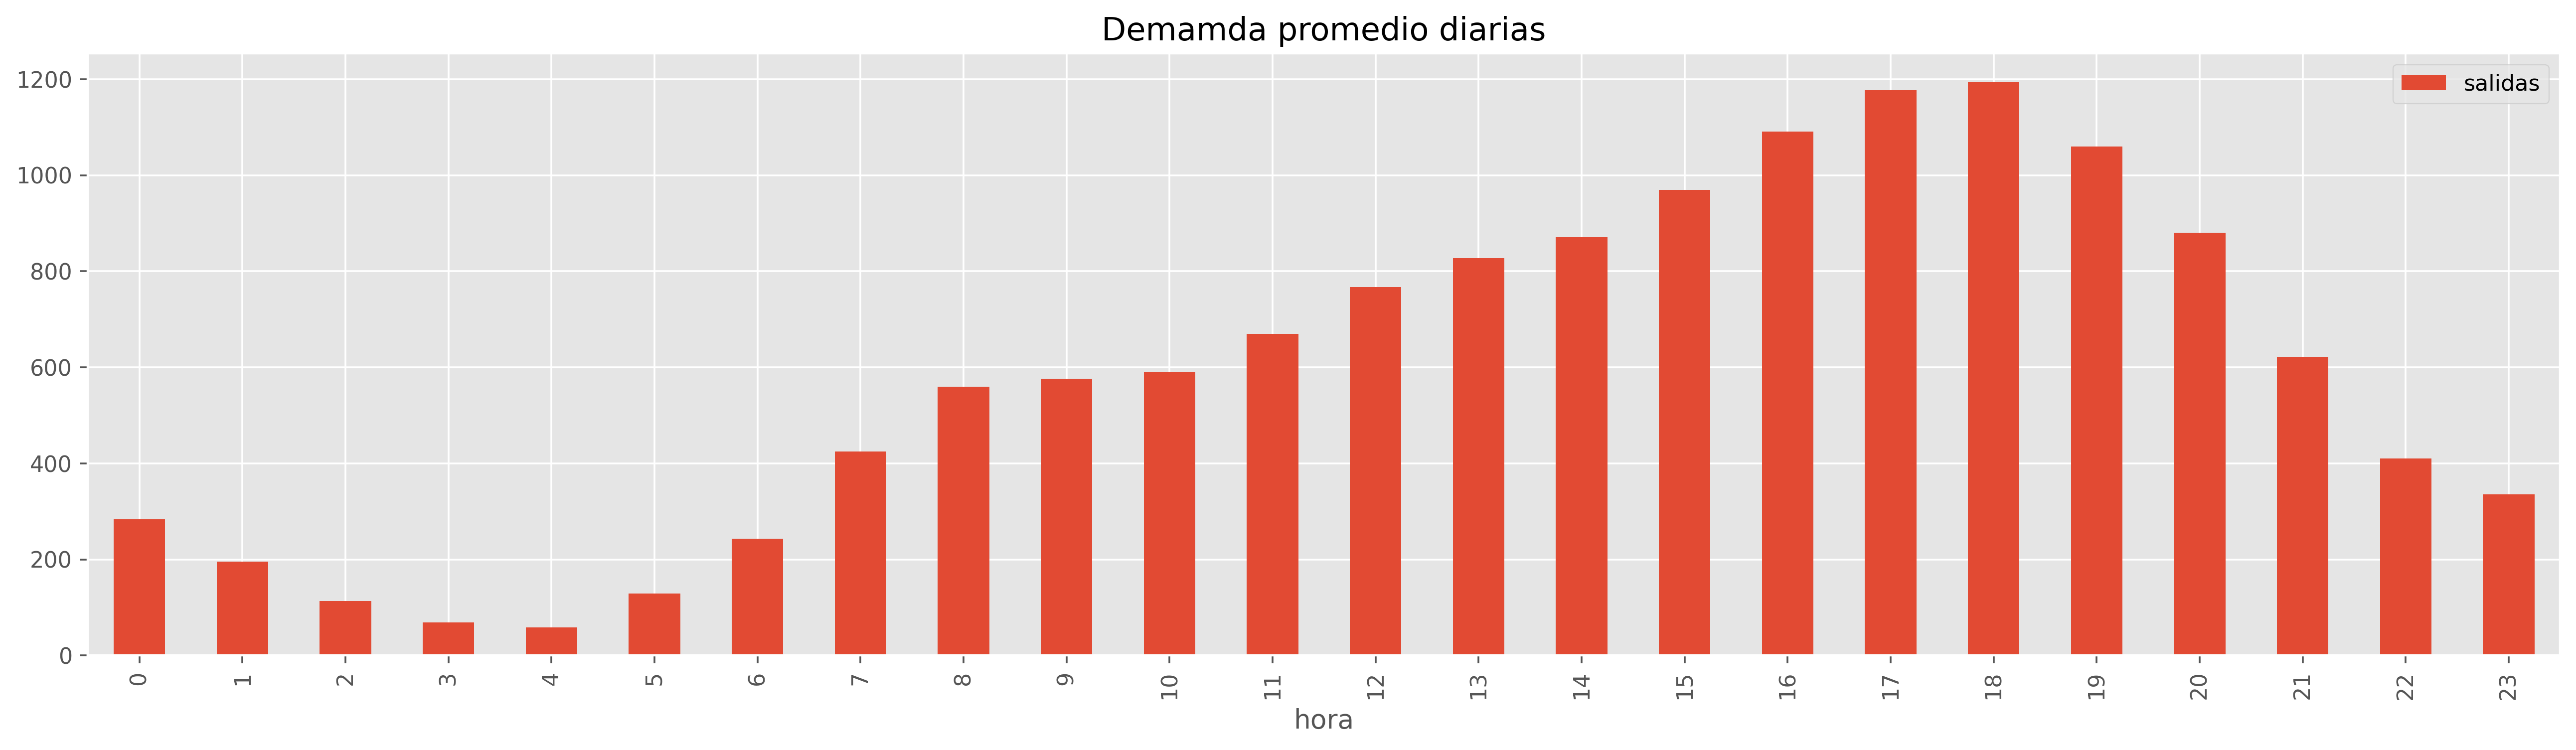

In [23]:
# figure(figsize=(20, 5), dpi=320)
demanda_horaria["salidas"].mean().plot( kind = 'bar', label = 'salidas')
pyplot.legend( loc = 'best' )
pyplot.title( 'Demamda semanal promedio' )
pyplot.show()

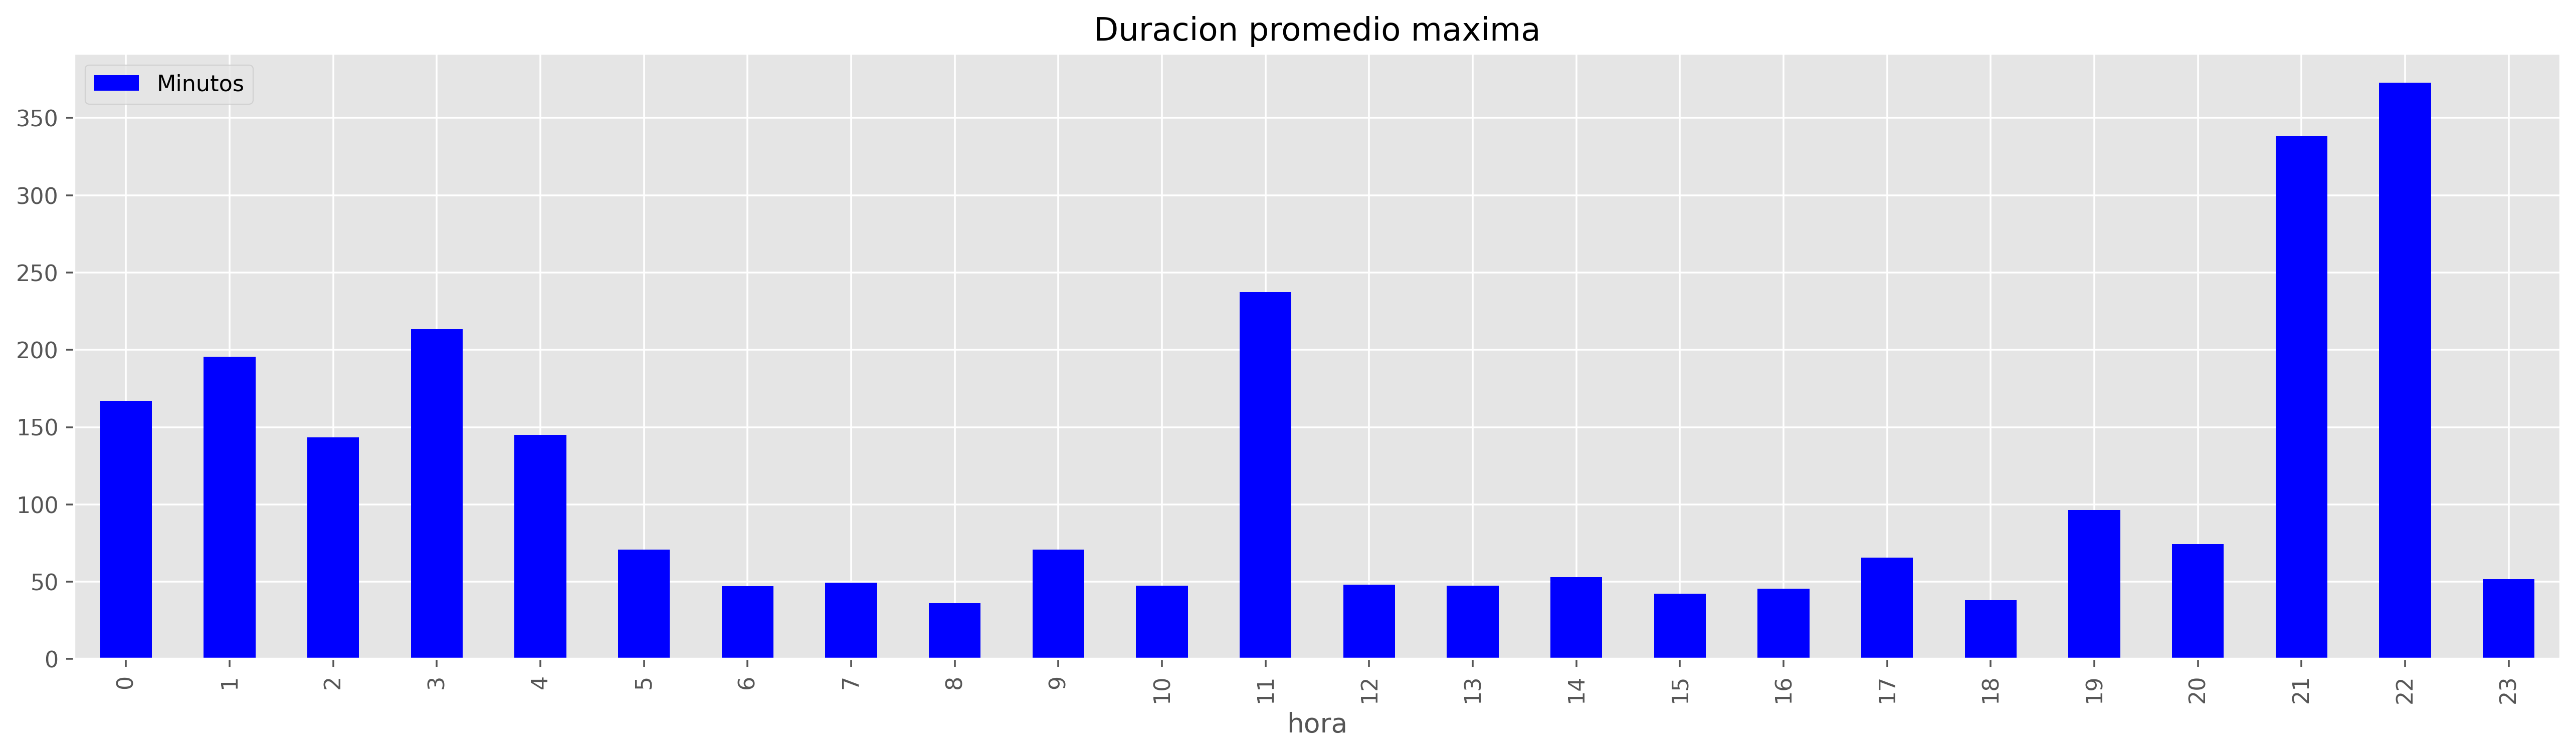

In [31]:
# duracion promedio maxima
demanda_horaria["duracion"].max().plot( kind = 'bar',label = 'Minutos', color={"blue" })
pyplot.legend( loc = 'best' )
pyplot.title( 'Duracion promedio maxima' )
pyplot.show()

In [ ]:
# ESTACIONES
# datasets["estaciones"]["df"]

In [45]:
# demanda_diaria.mean().sort_values( ascending = True ).head(20).plot( kind='bar',label = 'Salidas' )
demanda_estaciones = datasets["recorridos"]["df"]
demanda_estaciones = demanda_estaciones.groupby(
    ['origen_nombre', 'origen_id','fecha',]
).agg(
#   salidas = ( 'fecha',  'count'),
  salidas = ( 'origen_id',  'count'),
  arribos = ( 'destino_id',  'count'),
  estaciones = ( 'origen_nombre',  'first'),
#   duracion = ( 'duracion_mins',  'mean'),
)
# .sort_values( 'origen_nombre', ascending = True ).head(20)

demanda_estaciones = demanda_estaciones.pivot_table(
    index = [ 'fecha'],
    columns = ["estaciones"],
    values = ["salidas", 'arribos'],
    # aggfunc ='sum',
    fill_value = 0,
)

In [49]:
print( demanda_estaciones["salidas"].mean().sort_values( ascending = False).head(10) )

estaciones
GODOY CRUZ Y LIBERTADOR       101.965885
PACIFICO                      101.443497
PARQUE CENTENARIO              98.989339
PLAZA BOLIVIA                  92.823028
BARRANCAS DE BELGRANO          86.599147
CONSTITUCIÓN                   73.699360
GENERAL URQUIZA                73.027719
FACULTAD DE DERECHO            70.275053
PLAZA ITALIA                   69.264392
PLAZA REPÚBLICA DE ECUADOR     67.053305
dtype: float64


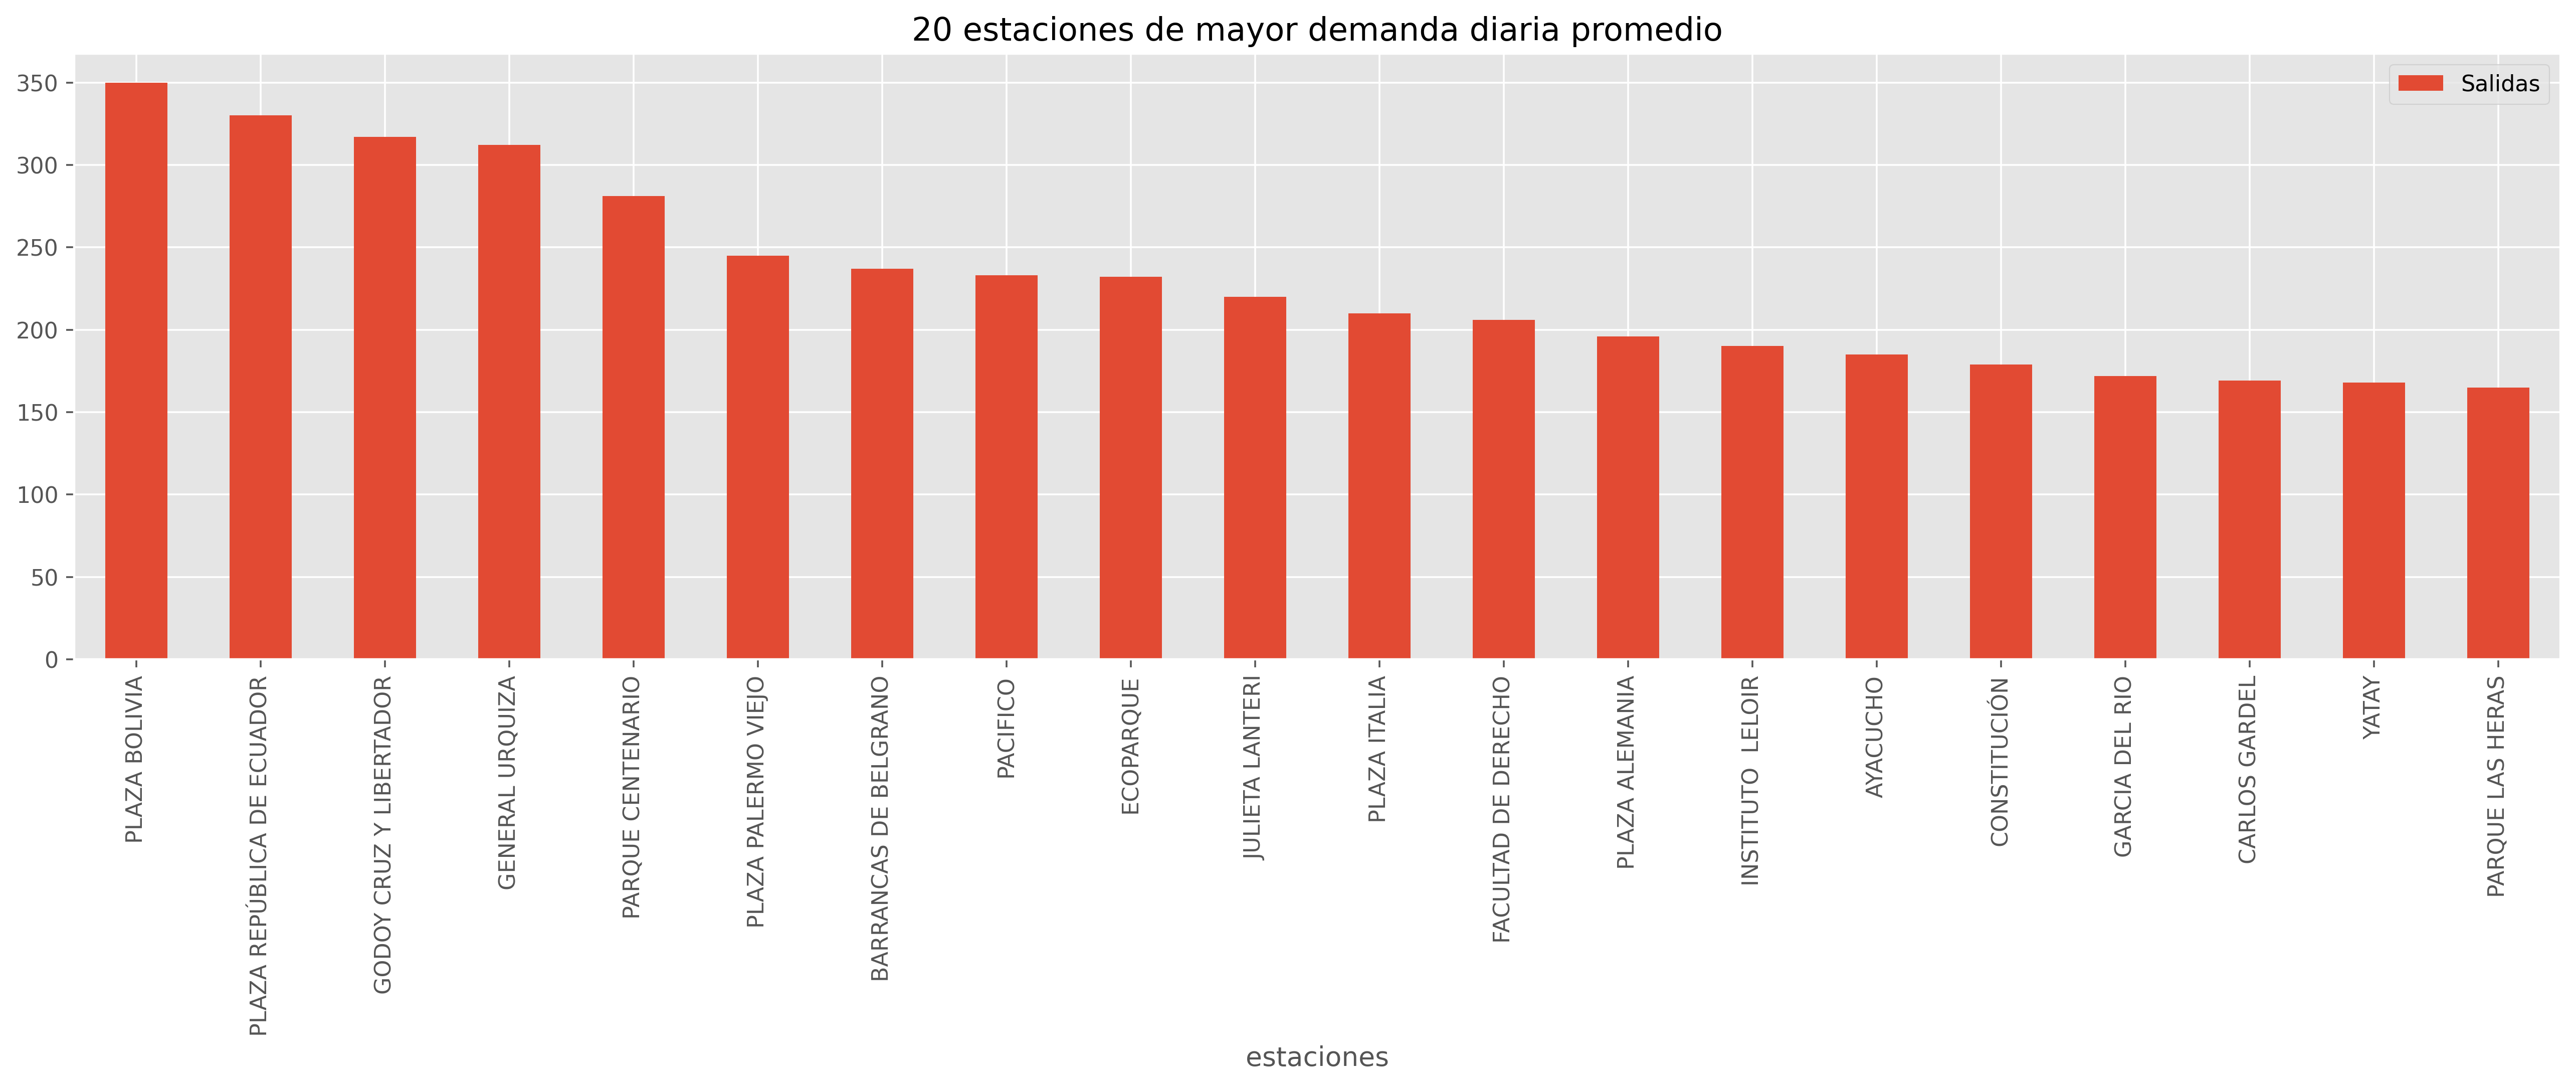

In [50]:
demanda_estaciones["salidas"].max().sort_values( ascending = False ).head(20).plot( kind='bar',label = 'Salidas' )
pyplot.legend( loc = 'best' )
pyplot.title( '20 estaciones de mayor demanda diaria maxima' )
pyplot.show()

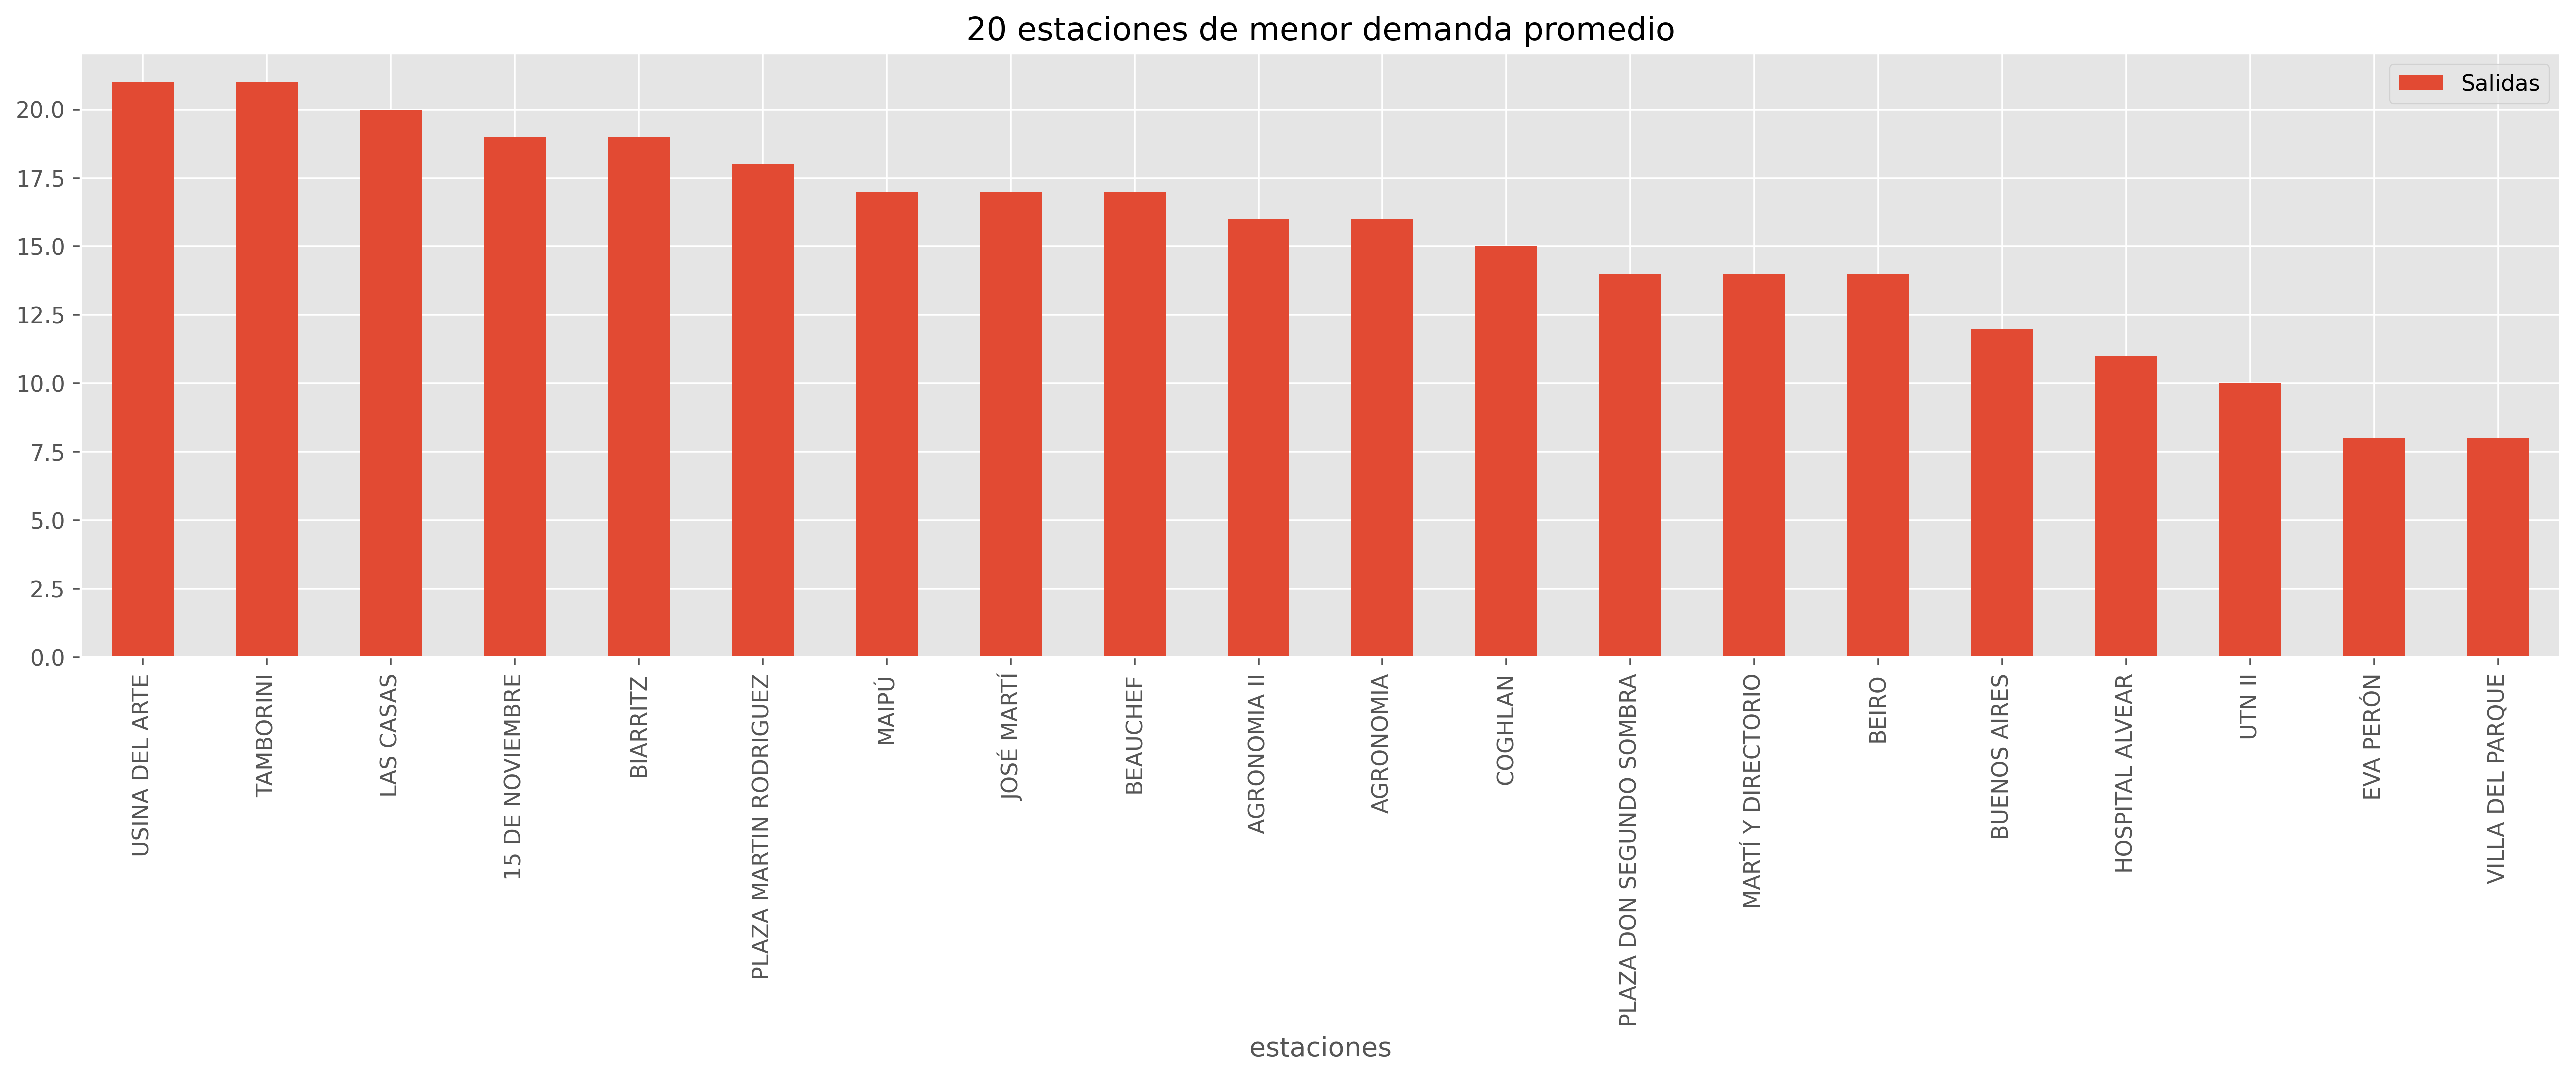

In [51]:
demanda_estaciones["salidas"].max().sort_values( ascending = False ).tail(20).plot( kind='bar',label = 'Salidas' )
pyplot.legend( loc = 'best' )
pyplot.title( '20 estaciones de menor demanda maxima' )
pyplot.show()

In [ ]:
# # https://sharkcoder.com/data-visualization/mpl-bidirectional
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import pandas as pd
# import seaborn as sns
# sns.set()
# %matplotlib notebook
# font_color = '#525252'
# hfont = {'fontname':'Calibri'}
# facecolor = '#eaeaf2'
# color_red = '#fd625e'
# color_blue = '#01b8aa'
# index = data.index
# column0 = data['Expenditures']
# column1 = data['Revenues']
# title0 = 'Expenditures, USD thousand'
# title1 = 'Revenues, USD thousand'    
#     fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
# fig.tight_layout()



# axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
# axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
# axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
# axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)
#     # If you have positive numbers and want to invert the x-axis of the left plot
# axes[0].invert_xaxis() 

# # To show data from highest to lowest
# plt.gca().invert_yaxis()
#     axes[0].set(yticks=data.index, yticklabels=data.index)
# axes[0].yaxis.tick_left()
# axes[0].tick_params(axis='y', colors='white') # tick color
#     axes[1].set_xticks([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])

# plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
            
# filename = 'mpl-bidirectional'
# plt.savefig(filename+'.png', facecolor=facecolor)

In [ ]:
# https://sharkcoder.com/data-visualization/mpl-stacked-bars

In [13]:
demanda_estaciones['salidas'].plot( label = 'Salidas' )
pyplot.legend( loc = 'best' )
pyplot.title( 'Demanda diaria x cada estación' )
pyplot.show()

In [ ]:
# # MEDIA MOVIL
# # import pandas_datareader.data as web
# # import matplotlib.pyplot as plt
# # import datetime
# # figure( figsize=(20, 5), dpi=320 )

# # pyplot.plot( demanda_diaria["duracion"].mean(), label= 'Duracion AVG' )
# demanda_diaria["duracion"].mean().plot( label = 'Duracion AVG' )

# # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
# # pyplot.plot( demanda_diaria["duracion"].rolling(9).mean(), label= 'MA 9 days')
# # pyplot.plot( demanda_diaria["duracion"].rolling(21).mean(),label= 'MA 21 days')
# pyplot.legend( loc = 'best' )
# pyplot.title( 'Duracion AVG  delta' )
# pyplot.show()

demanda_diaria["salidas"].mean().sort_values( ascending = True ).head(20).plot( kind='bar',label = 'Salidas' )
pyplot.legend( loc = 'best' )
pyplot.title( 'Dias de menos demamda' )
pyplot.show()


In [ ]:
# demanda_estaciones["salidas"].plot()
# # pyplot.legend( loc = 'best' )
# pyplot.title( 'Demanda diaria por estacion' )
# pyplot.show()

In [ ]:
# # print(demanda_diaria["salidas"])
# for dia in demanda_diaria["salidas"].columns.to_list():
# #     demandas = demanda_diaria["salidas"][h]
#     estaciones = demanda_diaria["salidas"][dia].reset_index()
#     for e in estaciones.iterrows():
#         estacion = e[1]
#         estacion_origen =  estacion['origen_id']
#         estacion_salidas =  estacion[h]
#         print(h, estacion_origen, estacion_salidas)

### Gruping

In [14]:
print(
    datasets["estaciones"]["df"]["salidas"].sum() -
    datasets["estaciones"]["df"]["arribos"].sum()
)

465


## RESAMPLING (REMUESTREO)

### Downsampling frequencies 

Tamaño de la muestra = Minuto

## SUBPRODUCTOS / CLUSTERING

### GRUPING & RESHAIPING
#### DEMANDA DIARIA

In [23]:
# GRUPING USERS
usurios = datasets["recorridos"]["df"].groupby(
    ['usuario_id']
).agg(
  salidas = ( 'destino_id',  'count'),
  vueltas = ( 'vuelta',  'sum'),
  velocidad = ( 'velocidad_kmm',  'mean'),
  distancia = ( 'distancia',  'mean')
)
# usurios = usurios.pivot_table(
#     index   = [ 'usuario_id'],
#     columns = "salidas",
#     values  = "salidas",
#     # aggfunc = 'count',
# ).sort_values('origen_id')
# demanda_diaria # comprobar

In [20]:
usurios = usurios[ ~usurios.isin([np.nan, np.inf, -np.inf]).any(1) ]
# usurios
usurios.sort_values( 'salidas' , ascending = False).head(30)

salidas  vueltas  velocidad  distancia
usuario_id                                        
4240            947       29   0.330000       7.09
12434           911      166   0.400000       9.47
35506           795        9   0.280000       3.87
14239           775       11   0.358800       9.16
668737          748        2   0.285000       3.89
16145           715        7   0.358333       7.24
174799          713        9   0.280000       4.19
101843          699       63   0.370000       5.69
167637          698       19   0.270000       5.31
101697          695       66   0.320000       6.00
201181          672       11   0.260000       5.61
268778          667        8   0.286667       7.29
569922          654       17   0.356667       5.96
19586           648        2   0.510000       6.95
493435          641        9   0.246667       6.33
693695          620       60   0.274444       8.10
666883          613        4   0.315000       5.95
59203           611        5   0.302000       5.60
51346           609       56   0.244286      11.55
37092           606       21   0.286250       5.70
494281          588       61   0.330000       5.84
167613          585       95   0.270000       5.66
20565           575        5   0.285000       5.52
581238          573        7   0.316842      12.04
664902          566        3   0.289167       5.31
362733          563       28   0.264000       8.45
279685          557        9   0.256667       9.47
666289          554        3   0.378750       6.76
191455          552       61   0.418571       7.50
726982          549       67   0.235000       7.43

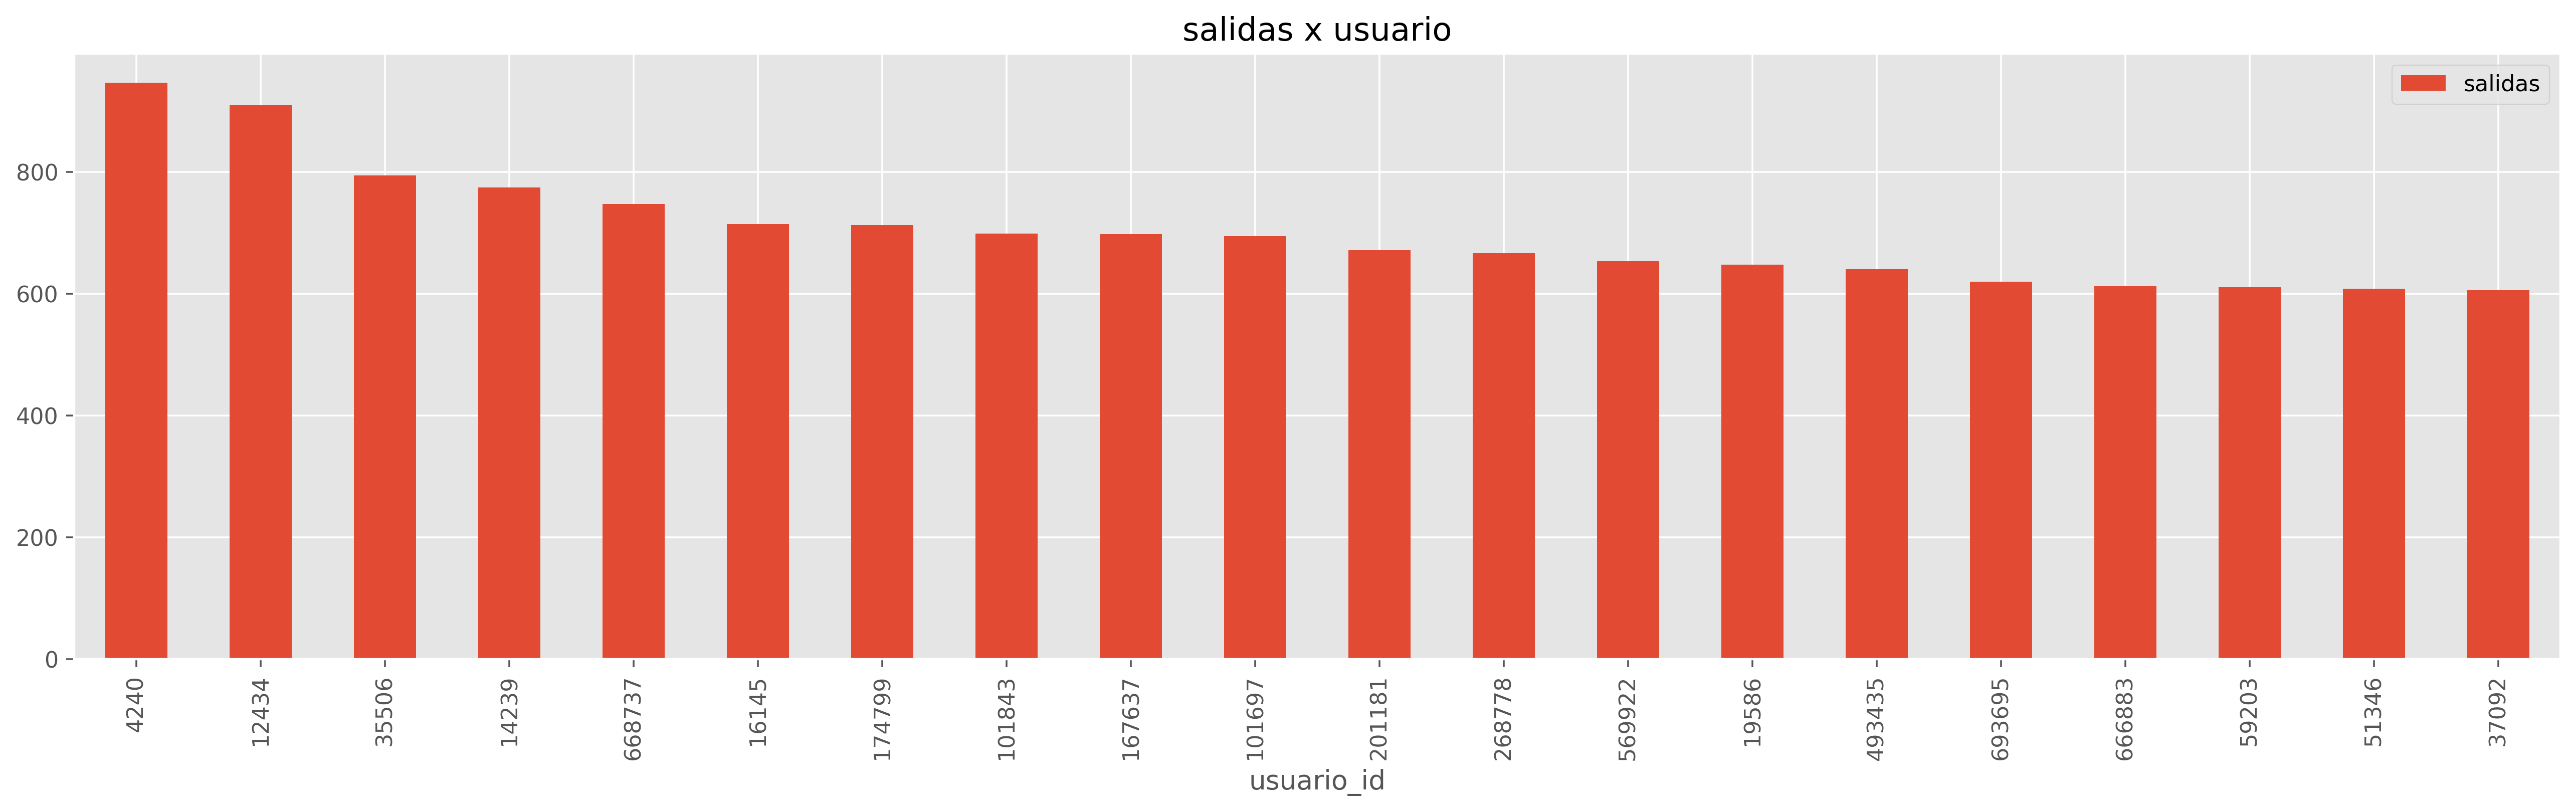

In [25]:
usurios["salidas"].sort_values( ascending = False ).head(20).plot( kind = 'bar',label = 'salidas')
pyplot.legend( loc = 'best' )
pyplot.title( 'salidas x usuario' )
pyplot.show()

# Analisis Exploratorio de Datos Espaciales



## Exploratory Spatial Data Analysis (ESDA)

https://alcidanalytics.com/p/geographic-heatmap-in-python

https://alysivji.github.io/getting-started-with-folium.html

https://medium.com/analytics-vidhya/measure-driving-distance-time-and-plot-routes-between-two-geographical-locations-using-python-39995dfea7e

In [ ]:
# demanda_viz = derivados["recorridos"]["df"]
# # Fitro x dia

# demanda_viz = demanda_viz[ demanda_viz["fecha"] == '2020-01-01' ]
# demanda_viz

In [ ]:
demanda_viz = derivados["recorridos"]["df"]
# Fitro x dia
fecha_viz   = '2020-03-01'
demanda_viz = demanda_viz[ demanda_viz["fecha"] == fecha_viz ]
demanda_viz = demanda_viz.groupby(
    ['origen_nombre', 'origen_id', 'hora', 'origen_lon','origen_lat']
).agg(
  salidas = ( 'hora',  'count' ),
  nombre  = ( 'origen_nombre',  'first' ),
  id      = ( 'origen_id',  'first' ),
  lon     = ( 'origen_lon',  'first' ),
  lat     = ( 'origen_lat',  'first' ),
)
# ).reset_index()
# df.set_index(['id', 'date', 'location'], append=True)
demanda_viz = demanda_viz.pivot_table(
    index = ['nombre',  'id', 'lon','lat'],
    columns = "hora",
    values = "salidas",
    fill_value = 0,
    # aggfunc = 'sum',
).sort_values('id')

In [ ]:
# import folium
# from folium import plugins
# # import pandas as pd
# # import matplotlib.pyplot as plt
# import seaborn as sns

# %matplotlib inline

In [ ]:
#... where m is my map object. And 5 is the time (seconds) to render the map.
# https://stackoverflow.com/questions/53565979/export-a-folium-map-as-a-png
# https://blog.ouseful.info/2015/12/15/grabbing-screenshots-of-folium-produced-choropleth-leaflet-maps-using-selenium/
# from time import sleep
import io
from PIL import Image

# !pip install folium selenium
import folium 
from folium.features import DivIcon
import selenium

import math
def mapear(x): 
    return int( (x / 10 ) * 255)



In [ ]:
# del m
m = ''
for h in demanda_viz.columns.to_list():
    del m
    m = folium.Map(
#         [ -34.606499,-58.381094 ], # obelisco
        [-34.606739, -58.435539 ], # parque centenario
        zoom_start = 13,
        zoom_control=False,
        scrollWheelZoom=False,
        dragging=False
#         tiles='stamentoner'
    )
    folium.map.Marker(
        [ -34.559920, -58.372211 ],
        icon = DivIcon(
            icon_size=(600,400),
            icon_anchor=(0,0),
            html='<div style="font-size: 20pt;font-family: monospace;">' \
            + fecha_viz + ' HORA:' + "{:02d}".format( h ) \
            + '</div>',
        )
    ).add_to(m)
    demandas = demanda_viz[h]
    estaciones = demanda_viz[h].reset_index()
    for e in estaciones.iterrows():
        estacion = e[1]
        folium.CircleMarker(
            [ estacion['lat'], estacion['lon'] ],
            radius = estacion[h] * 5, 
            popup = "{0}\:{1}\demanda:{2}".format(
                estacion['id'],
                estacion['nombre'],
                str(estacion[h]),
            ),
            fill_color = "#{0:02x}{1:02x}{2:02x}".format(
                mapear( int(estacion[h]) ),
                255 - mapear( int(estacion[h]) ) ,
                255 - mapear( int(estacion[h]) )
            )
        ).add_to(m)
#     m.save( 'ESDA/' + fecha_viz + '_' + "{:02d}".format( h ) + '_' + 'map.html')
    
    img_data = m._to_png(5)
    img = Image.open(io.BytesIO(img_data))
    img.save( 'ESDA/' + fecha_viz + '_' + "{:02d}".format( h ) + '_' + 'map.png' )

In [ ]:
# !convert -density 72 'ESDA/2020-03-01_00_map.html' '2020-03-01_00_map.html'


In [ ]:
# !ffmpeg -pattern_type glob -i './ESDA/*.png' -vf zoompan=z=1:d=4:s=1366x683:fps=5,framerate=25 -vcodec libx264 -acodec aac ESDA.mp4
!ffmpeg -pattern_type glob -i './ESDA/*.png' -vf zoompan=z=1:d=4:s=1366x683:fps=5,framerate=25 -vcodec libx264 -an ESDA.mp4

In [ ]:
# Import the library
from chord import Chord


# Basic cord diagram
# TODO THIS WON'T WORK BECAUSE INPUT TYPE ISNT RECOGNIZE
# Chord(data, names).to_html("../../static/interactiveCharts/chord-diagram-chord-library.html")
matrix = [
    [0, 5, 6, 4, 7, 4],
    [5, 0, 5, 4, 6, 5],
    [6, 5, 0, 4, 5, 5],
    [4, 4, 4, 0, 5, 5],
    [7, 6, 5, 5, 0, 4],
    [4, 5, 5, 5, 4, 0],
]


names = ["Action", "Adventure", "Comedy", "Drama", "Fantasy", "Thriller"]

matrix
[[0, 5, 6, 4, 7, 4],
 [5, 0, 5, 4, 6, 5],
 [6, 5, 0, 4, 5, 5],
 [4, 4, 4, 0, 5, 5],
 [7, 6, 5, 5, 0, 4],
 [4, 5, 5, 5, 4, 0]]

Chord(matrix, names).to_html("../../static/interactiveCharts/chord-diagram-chord-library.html")
%%html
<iframe src="../../interactiveCharts/chord-diagram-chord-library.html"
    width="800"
    height="600"
    title="Chord diagram with the chord library"
    style="border:none"
></iframe>

## reserva

In [ ]:
# # !pip install ffmpeg-python
# import ffmpeg
# # stream = ffmpeg.input('input.mp4')
# # stream = ffmpeg.hflip(stream)
# # stream = ffmpeg.output(stream, 'output.mp4')
# # ffmpeg.run(stream)
# del stream
# stream = ffmpeg.input( 'ESDA/*.png', pattern_type = 'glob', framerate = 24 )
# stream = ffmpeg.output( stream, 'ESDA.mp4')
# ffmpeg.run(stream)


In [ ]:
# import math
# def mapear(x): 
#   return int( (x / 30295 ) * 255) 
# m = folium.Map(
#   [ -34.606499,-58.381094 ],
#   zoom_start = 14
# )
# #  mark each station as a point
# for e in derivados["estaciones"]["df"].iterrows():
#   folium.CircleMarker(
#       [ estacion['lat'], estacion['lon'] ],
#       radius= estacion['salidas'] * 0.002, 
#       popup = "{0}\nsalidas:{1}\narribos:{2}".format(
#           estacion['nombre'],
#           str(estacion['salidas']),
#           str(estacion['arribos'])
#       ),
#       fill_color = "#{0:02x}{1:02x}{2:02x}".format(
#           mapear( int(estacion['salidas']) ),
#           255 - mapear( int(estacion['salidas']) ) ,
#           255 - mapear( int(estacion['salidas']) )
#       )
#   ).add_to(m)
# m

In [ ]:
# # convert to (n, 2) nd-array format for heatmap
# # stationArr = derivados["estaciones"]["df"][['lat', 'lon']].as_matrix()
# # https://stackoverflow.com/a/63293803
# stationArr = derivados["estaciones"]["df"][['salidas']].values

# # plot heatmap
# m.add_children(plugins.HeatMap(stationArr, radius=15))
# m

In [ ]:
"""
We will create a helper function with default keyword arguments to abstact away
Folium's complexity. This leaves us with a simple API we can use going forward.
https://alysivji.github.io/getting-started-with-folium.html
"""
def map_points(
    df,
    lat_col = 'lat',
    lon_col = 'lon',
    zoom_start = 11, 
    plot_points = False,
    pt_radius = 15, 
    draw_heatmap = False,
    heat_map_weights_col = None, 
    heat_map_weights_normalize = False,
    heat_map_radius = 15,
    popup_name = 'nombre'
):
  """
  Creates a map given a dataframe of points. 
  Can also produce a heatmap overlay

  Arg:
    df: dataframe containing points to maps
    lat_col: Column containing latitude (string)
    lon_col: Column containing lonitude (string)
    zoom_start: Integer representing the initial zoom of the map
    plot_points: Add points to map (boolean)
    pt_radius: Size of each point
    draw_heatmap: Add heatmap to map (boolean)
    heat_map_weights_col: Column containing heatmap weights
    heat_map_weights_normalize: Normalize heatmap weights (boolean)
    heat_map_radius: Size of heatmap point
    popup_name: name of the popup

  Returns:
      folium map object
  """

  ## center map in the middle of points center in
  middle_lat = df[lat_col].median()
  middle_lon = df[lon_col].median()

  curr_map = folium.Map(
      location=[middle_lat, middle_lon],
      zoom_start=zoom_start
  )
  cols_to_pull = [ lat_col, lon_col, heat_map_weights_col ]
  # add points to map
  if plot_points:
    for _, row in df.iterrows():
      folium.CircleMarker(
        [ row[lat_col], row[lon_col] ],
        radius = pt_radius,
        popup = row[ popup_name ],
        fill_color = "#3db7e4", # divvy color
      ).add_to( curr_map )
  

  # add heatmap
  if draw_heatmap:
    # convert to (n, 2) or (n, 3) matrix format
    if heat_map_weights_col is None:
      cols_to_pull = [lat_col, lon_col]
    else:
      # if we have to normalize
      if heat_map_weights_normalize:
        df[ heat_map_weights_col] = df[heat_map_weights_col] / df[heat_map_weights_col].sum()
        cols_to_pull = [ lat_col, lon_col, heat_map_weights_col ]
      stations = df[cols_to_pull].values
      curr_map.add_children(
          plugins.HeatMap(
              stations,
              radius = heat_map_radius
          )
      )
  return curr_map

In [ ]:
# del m
m = map_points(
    derivados["estaciones"]["df"],
    plot_points = False,
    draw_heatmap = True,
    heat_map_weights_col = 'salidas',
    heat_map_weights_normalize = True,
)
m

In [ ]:
derivados["recorridos"]["df"].info()

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/drive')

In [ ]:
# Fetch weather from drive
id = '14BpBfjQ3IrfeK8CajCWrEdfPg7S0eqc8'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('weather-data-ba.csv') 
weather_data_df = pd.read_csv('weather-data-ba.csv')
weather_data_df.head()
weather_data_df = weather_data_df.filter(
    ['DATE','PRCP','TAVG']
)
weather_data_df.isnull().sum( axis = 0 )
weather_data_df['PRCP'] = weather_data_df['PRCP'].replace( np.nan, 0 )
weather_data_df.head()

In [ ]:
bicicletas["recorridos_clima_df"].to_csv(
    '/drive/My Drive/Datasets-bicing/recorridos-clima-2020-2021.csv'
)

In [ ]:
bicicletas["recorridos_clima_df"].head()

## Bajar el ultimo
Bajar el dataset limpio desde drive

In [ ]:
from google.colab import files
files.download('recorridos_2020-2021.zip')

In [ ]:
bicicletas["recorridos_df"].to_csv(
    '/drive/My Drive/Datasets-bicing/recorridos_2020-2021.csv'
)

In [ ]:
id = '17liAPD1lyj2wT-Hcbh4ed9-Cn4peoyIq'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('recorridos_2020-2021.csv') 
bicicletas["recorridos_df"] = pd.read_csv('recorridos_2020-2021.csv')
bicicletas["recorridos_df"].head()